In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('creditcard.csv')

In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df['Class'].describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [14]:
g=df.groupby('Class')

In [18]:
for Class, Class_df in g:
    print(Class_df['Class'].describe())
    print('\n')

count    284315.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Class, dtype: float64


count    492.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Class, dtype: float64




In [20]:
284315//492

577

In [24]:
577*5

2885

non_fraudulent : fraudulent :: 577 : 1

sample composition -

2885 non_fraudulent
5 fraudeulent transactions

In [71]:
fraudulent_dataset=df[df['Class']==1][5:]

In [72]:
non_fraudulent_dataset=df[df['Class']==0][2885:]

In [73]:
fraudulent_sample=df[df['Class']==1][:5]
non_fraudulent_sample=df[df['Class']==0][:2885]

In [74]:
source=pd.concat((fraudulent_sample, non_fraudulent_sample))

In [75]:
target=pd.concat((fraudulent_dataset, non_fraudulent_dataset))

Now source has similar Class distribution as df and for each transaction in source we have to search for top 10 transactions in target with lowest similarity

$$ similarity(\boldsymbol{v_i},\boldsymbol{v_j})=\cos ^{ - 1}\frac {\boldsymbol{v_i} \cdot \boldsymbol{v_j}} {\lVert \boldsymbol{v_i} \rVert \lVert \boldsymbol{v_j} \rVert} $$

In [94]:
source_matrix=source.as_matrix()
target_matrix=target.as_matrix()



In [ ]:
ans=[]

for sIndex, sample in zip(source.index,source_matrix):
    similarity_list=[]
    
    
    for tIndex, tVec in  zip(target.index,target_matrix):
        similarity_list.append((np.dot(sample, np.transpose(tVec))/(np.linalg.norm(sample)*np.linalg.norm(tVec)), tIndex))
    
    print('sample' + str(sIndex))
    
    similarity_list=sorted(similarity_list, key=lambda x:x[0])
    similarity_list.reverse()
    ans.append((sIndex, similarity_list[:10]))
    
    

In [101]:
ans

[(541,
  [(0.99976649082813251, 8296),
   (0.99976421554366079, 8615),
   (0.99975931948313501, 9035),
   (0.99975862828275308, 8335),
   (0.99975631619621008, 9252),
   (0.9997533482777764, 9487),
   (0.99975328266459573, 9509),
   (0.99974988190947089, 9179),
   (0.99974511543885869, 6717),
   (0.99974491666018661, 6719)]),
 (623,
  [(0.93330749210591868, 3145),
   (0.9194020417634009, 6783),
   (0.91726090739742794, 3724),
   (0.91042396215740407, 3780),
   (0.89756079278700307, 58465),
   (0.89378125634064454, 4727),
   (0.89075241051183829, 4134),
   (0.88703259890406161, 7617),
   (0.88640911144182344, 5058),
   (0.87540075249639782, 3559)]),
 (4920,
  [(0.99999750008394594, 13311),
   (0.99999741704455314, 37401),
   (0.99999738073242017, 61333),
   (0.99999730458482394, 6723),
   (0.99999728797166743, 89606),
   (0.99999723643318816, 218985),
   (0.99999718019967743, 51864),
   (0.9999971719698677, 35942),
   (0.99999711697816496, 58098),
   (0.99999710694885746, 77963)]),
 (61

# Now let's do the EDA

## Dataset description
284807 rows
31 features

Feature 1 is time elapsed between this transaction and first transaction in dataset
Features 2 - 29 are Principle components of some unknown features
Feature 30 in transaction amount

Class label in feature 31

## Objective
Find the best features for classification

In [43]:
df.describe().loc['std'].max()

47488.145954565822

In [7]:
df.describe()['Amount']

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [3]:
fraudulent=df[df['Class']==1]
genuine=df[df['Class']==0]

In [5]:
from statsmodels import robust

In [6]:
robust.mad(df['Amount'])

29.97821685818327

Indicates presence of outliers

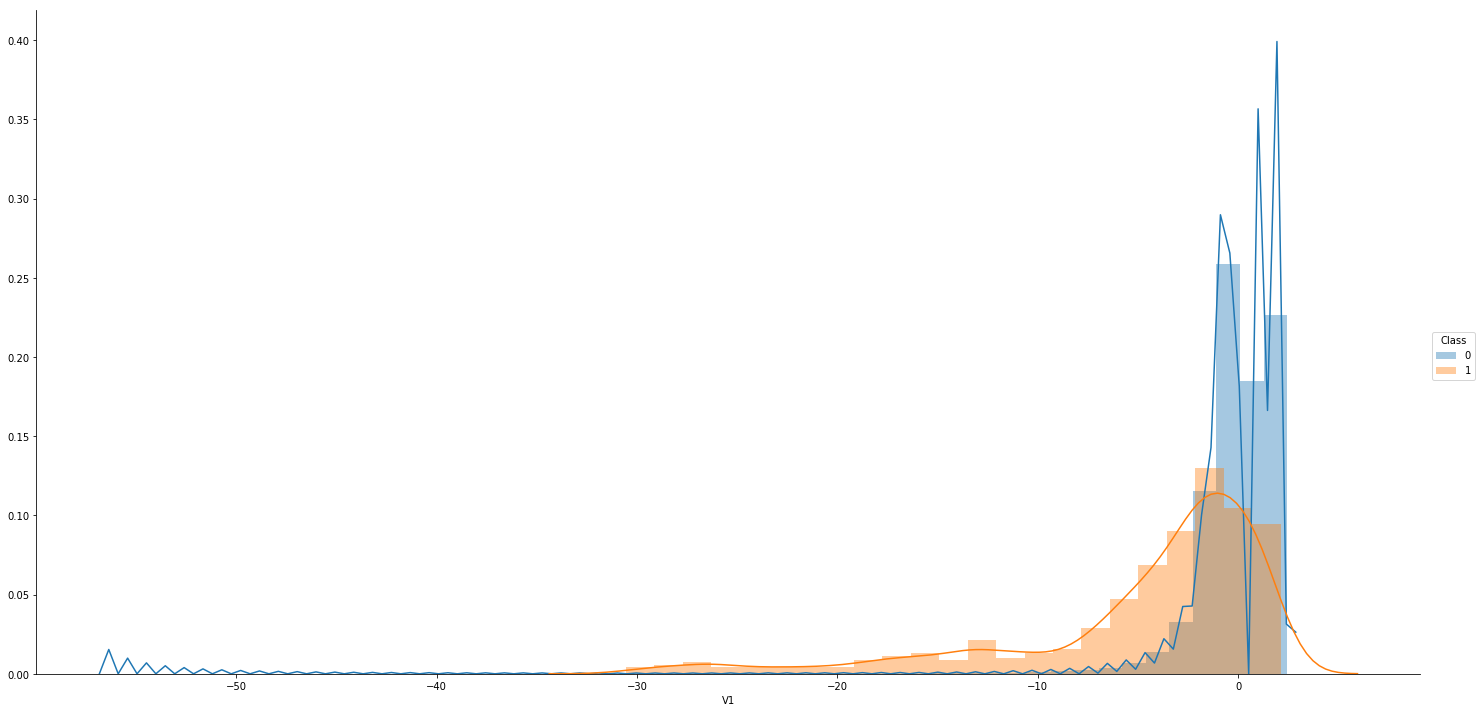

In [57]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V1") \
   .add_legend();

In [111]:
print(np.percentile(fraudulent['V1'],q=[0,25,50,75,90,100]))
print(np.percentile(genuine['V1'], q=[100,75,50,25,10,0, 40]))

[-30.55238004  -6.03606299  -2.34249745  -0.41920008   1.07523544
   2.13238602]
[  2.45492999e+00   1.31621801e+00   2.00232859e-02  -9.17543591e-01
  -1.88472416e+00  -5.64075096e+01  -4.24916604e-01]


there is overlap between two pdfs however we can observe
75% fraudulent transactions have V1 less than -0.42
60% genuine transactions have V1 more than -0.42.<br>
This makes V1 a fairly feature for classification

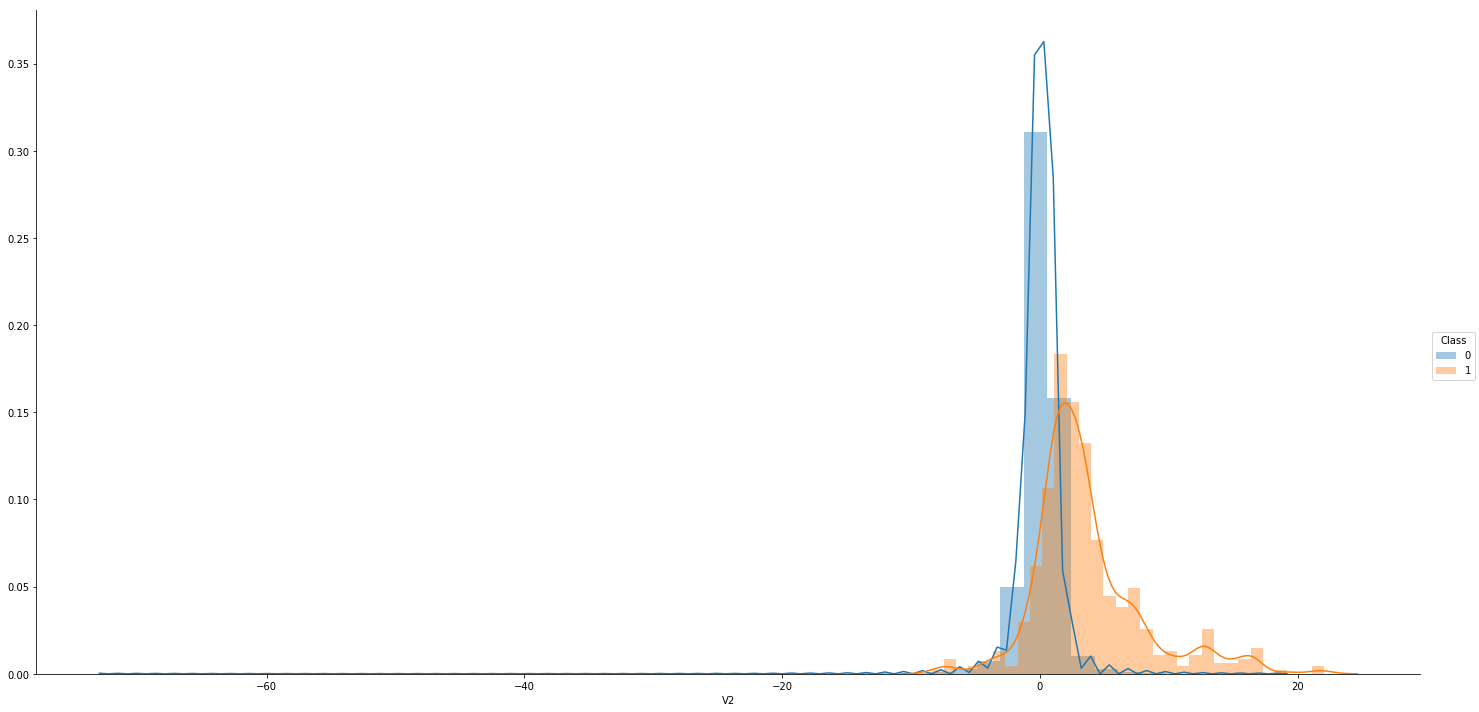

In [58]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V2") \
   .add_legend();

In [117]:
print(np.percentile(fraudulent['V2'],q=[0,21,50,75,90,100]))
print(np.percentile(genuine['V2'], q=[100,75,85,50,25,10,0]))

[ -8.40215368   1.06997849   2.7178686    4.97125732   8.76972245
  22.05772899]
[  1.89024528e+01   8.00446405e-01   1.10659479e+00   6.40697590e-02
  -5.99472583e-01  -1.36060501e+00  -7.27157276e+01]


At first glance pdfs seem to overlap a lot but careful analysis reveals that 85% of genuine transactions have V2 less than 1.1065 whereas 79% fraudulent transactions have V2 more than 1.1069. This makes V2 a very good choice for discrimination

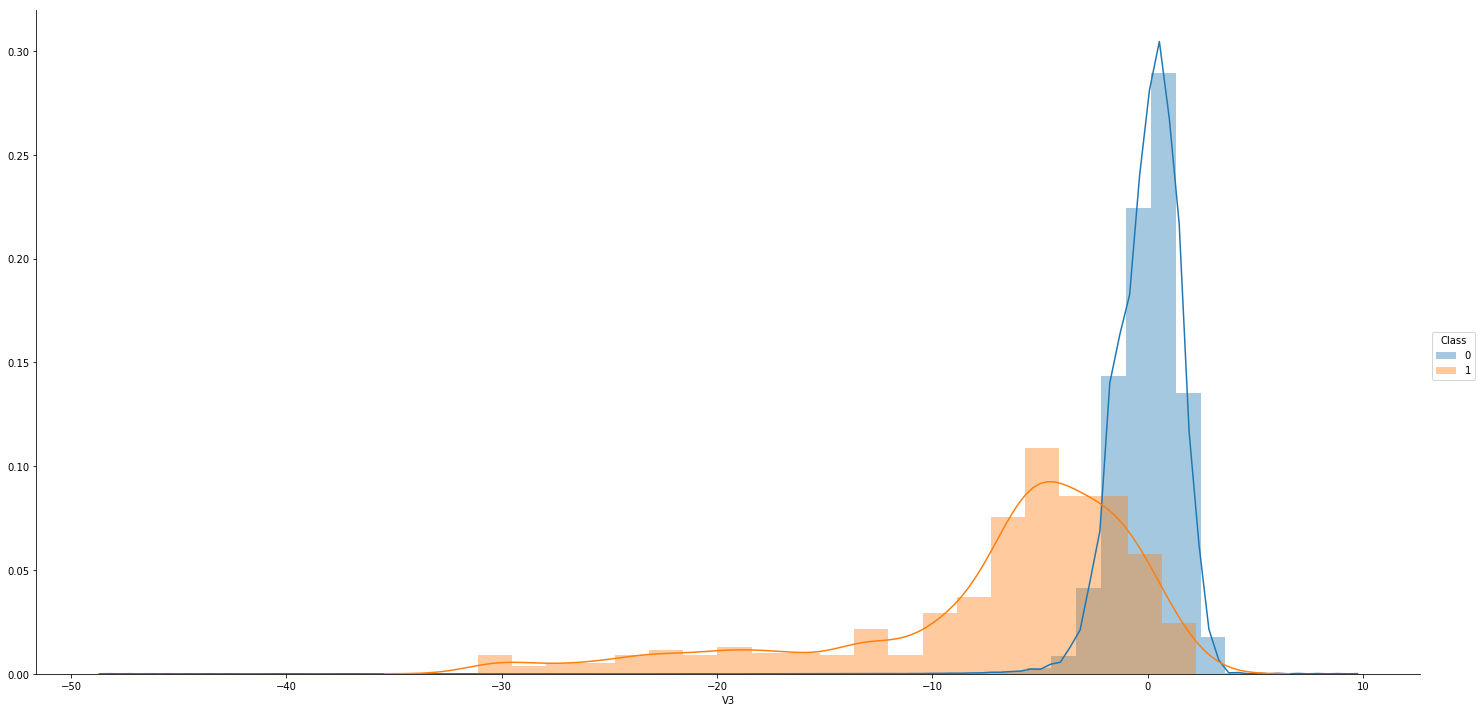

In [59]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V3") \
   .add_legend();

It can be seen visually that a large chunk of fraudulent transactions have V3 less than about -1 (intersection of two pdfs) and genuine ones have V3 greater than -1<br>
A more detailed analysis reveals great results with 80% fraudulent transactions having V3 less than -1.67 and 80% genuine ones having V3 more than -1.16, a very good discriminant indeed.

In [121]:
print(np.percentile(fraudulent['V3'],q=[80]))
print(np.percentile(genuine['V3'], q=[20]))

[-1.67891456]
[-1.16267187]


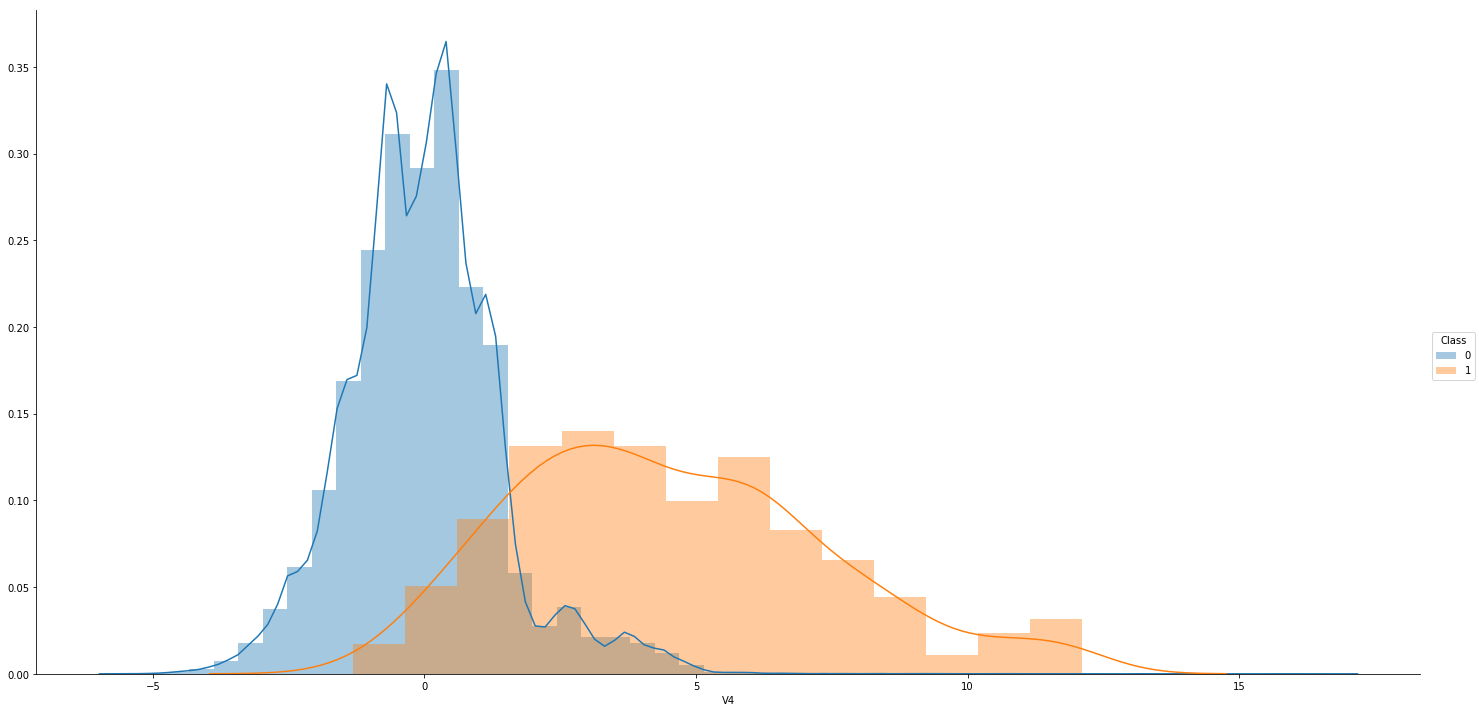

In [60]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V4") \
   .add_legend();

This pretty much resembles V3 and is indeed a great discriminating feature<br>
85% fraudulent transactions have V4 more than 1.6 and 85% genuine transactions have V4 less than 1.2

In [126]:
print(np.percentile(fraudulent['V4'],q=[15]))
print(np.percentile(genuine['V4'], q=[85]))

[ 1.60192399]
[ 1.20808306]


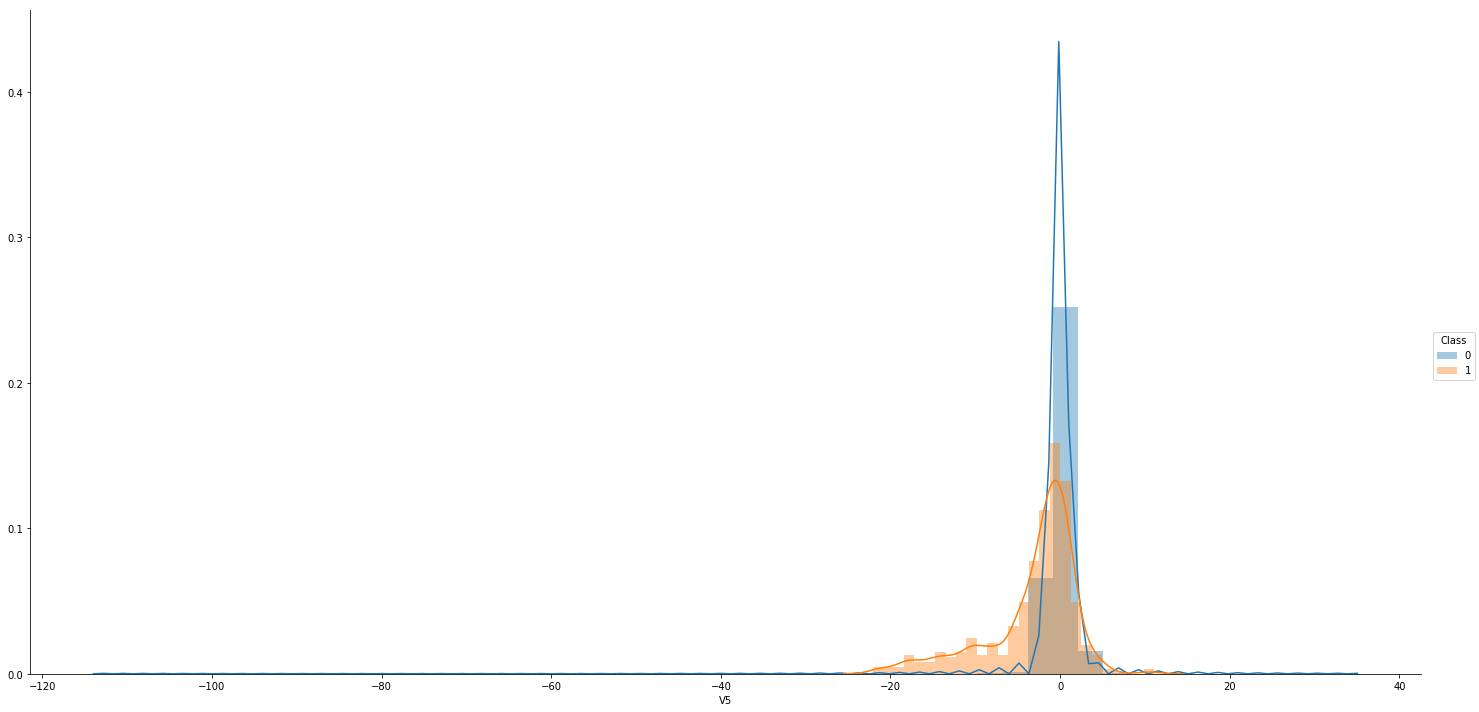

In [61]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V5") \
   .add_legend();

As compared to V4 and V3 this does not seem to be a very good feature<br>
66% fraudulent transactions have V5 less than -0.417 and 66% genuine transactions have V5 more than -0.43

In [137]:
print(np.percentile(fraudulent['V5'],q=[66]))
print(np.percentile(genuine['V5'], q=[34]))

[-0.41771202]
[-0.43696705]


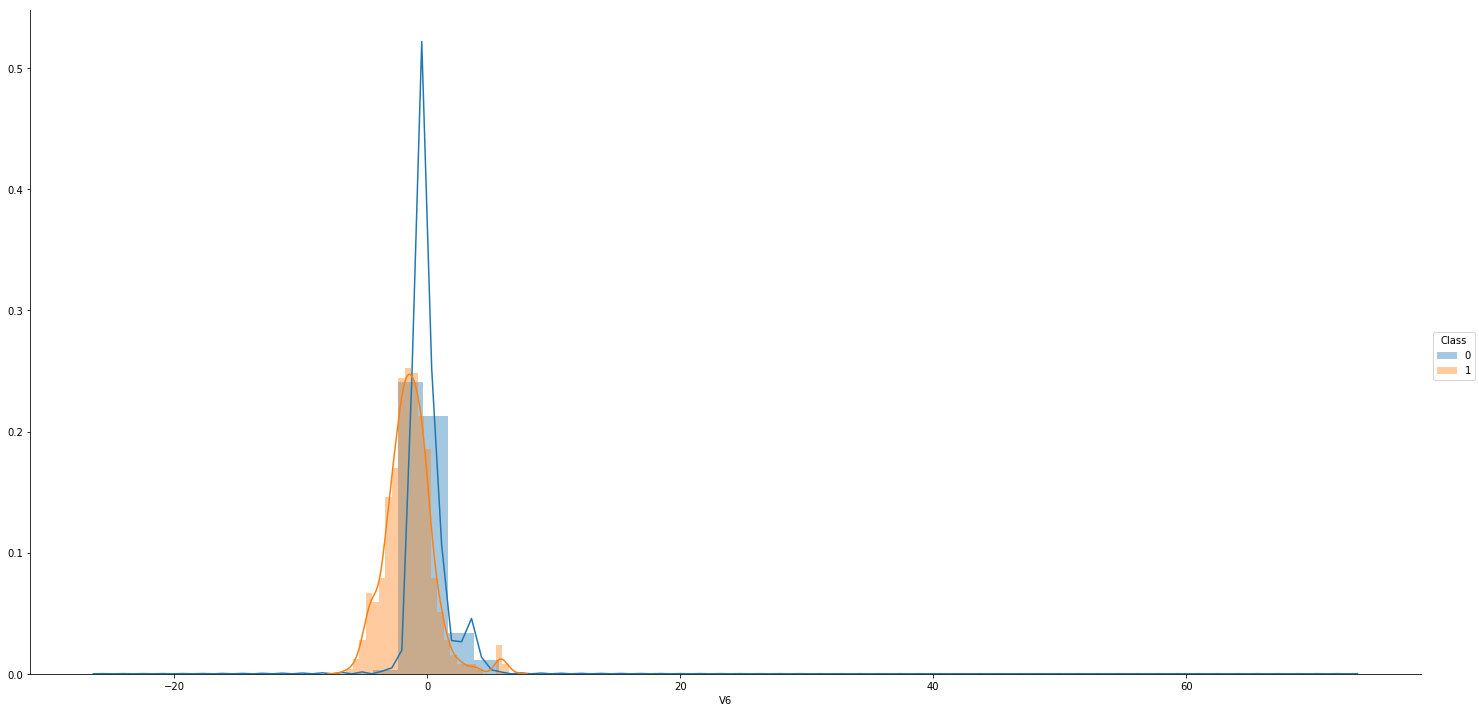

In [63]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V6") \
   .add_legend();

In [140]:
print(np.percentile(fraudulent['V6'],q=[70]))
print(np.percentile(genuine['V6'], q=[30]))

[-0.6244269]
[-0.66644016]


This is surely better than V5 as we can see there is a 70% fraudulent distinguished from 70% genuine transactions based on V6

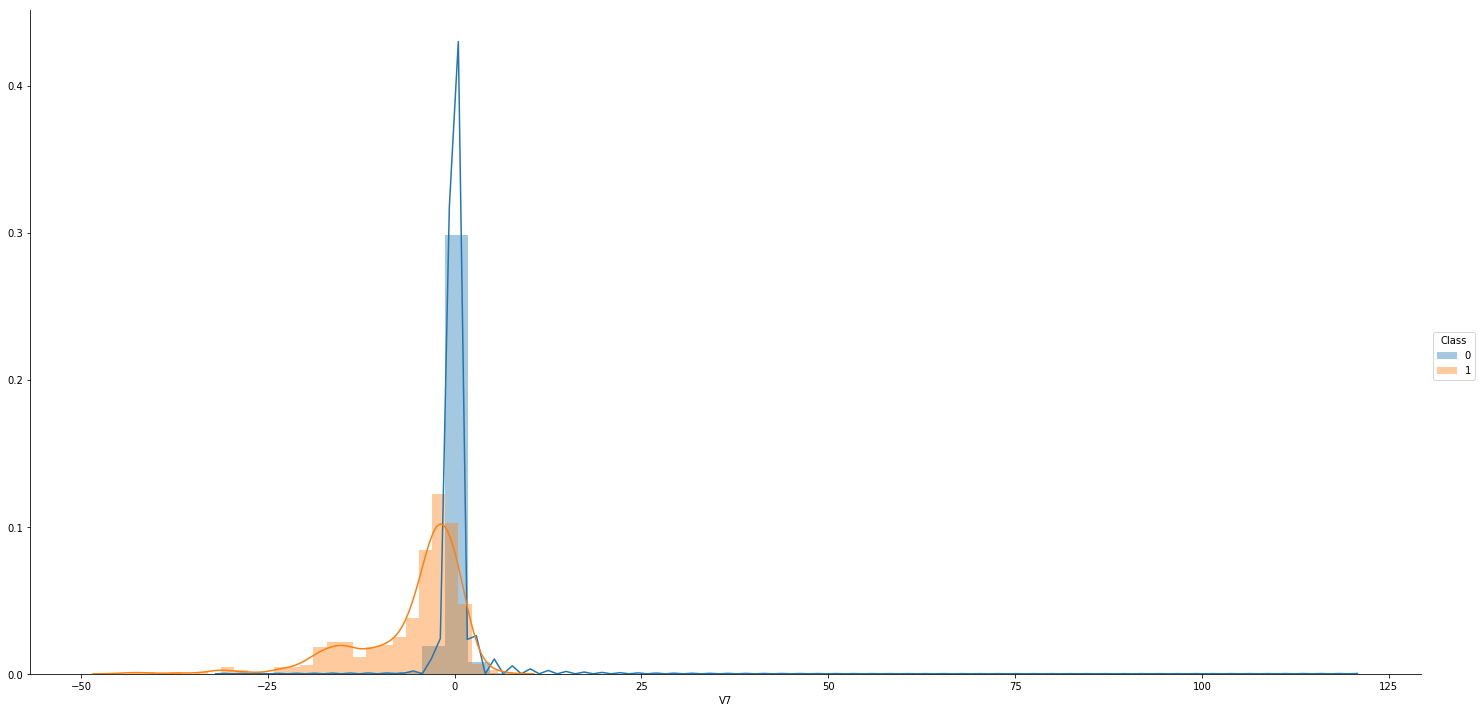

In [64]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V7") \
   .add_legend();

In [147]:
print(np.percentile(fraudulent['V7'],q=[77]))
print(np.percentile(genuine['V7'], q=[23]))

[-0.82341149]
[-0.60213432]


This feature is slightly better than V6 offering a 77% classification accuracy

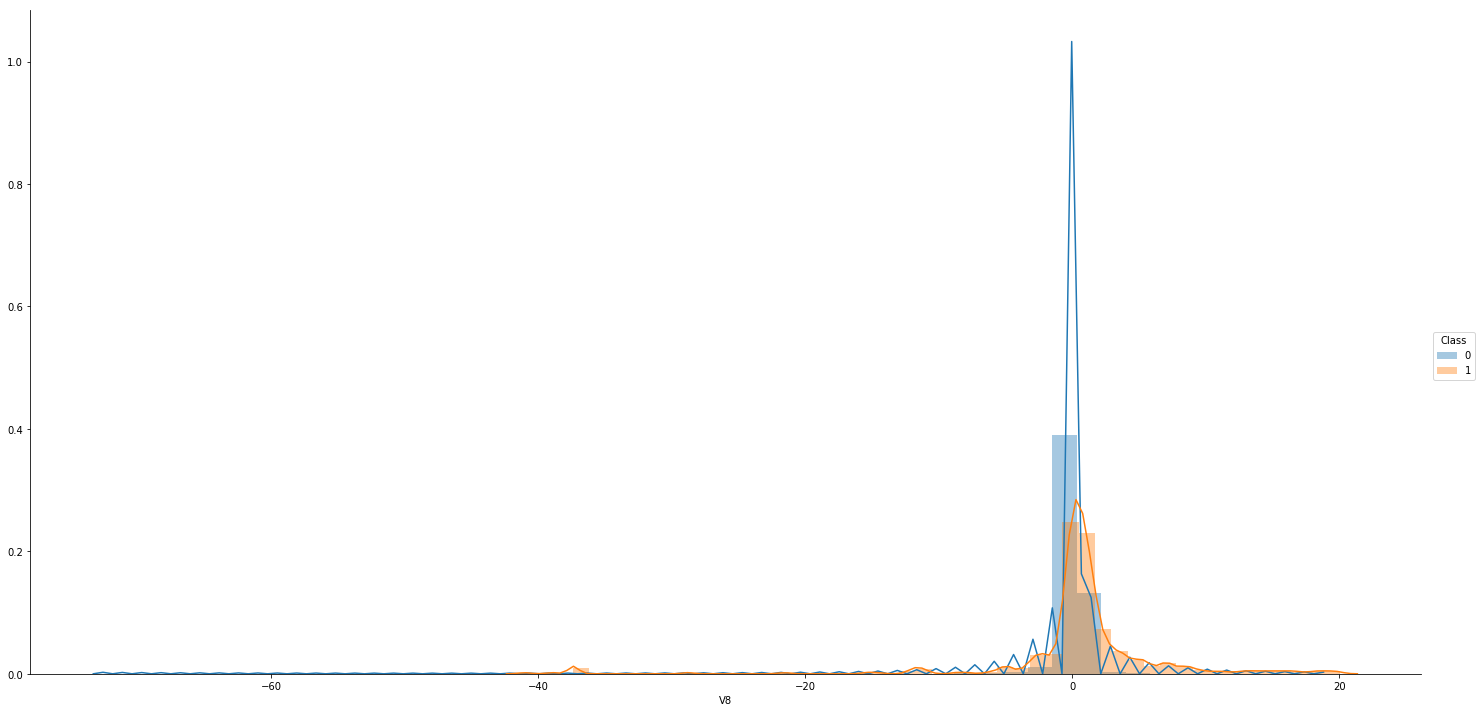

In [65]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V8") \
   .add_legend();

In [155]:
print(np.percentile(fraudulent['V8'],q=[37]))
print(np.percentile(genuine['V8'], q=[63]))

[ 0.1571183]
[ 0.15303342]


This feature offers a 63% classification accuracy and hence not a very good choice

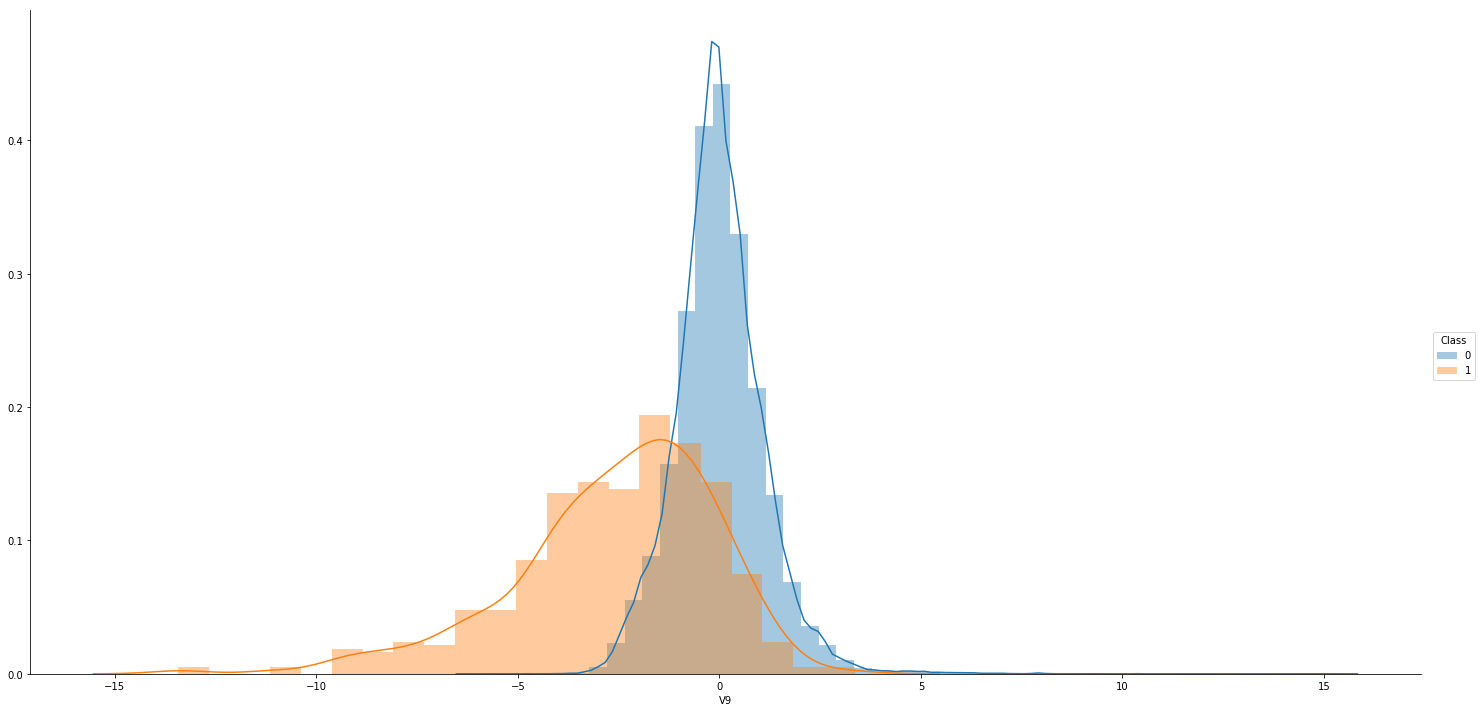

In [66]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V9") \
   .add_legend();

In [158]:
print(np.percentile(fraudulent['V9'],q=[77]))
print(np.percentile(genuine['V9'], q=[23]))

[-0.71721535]
[-0.7035978]


This is a fairly good feature offering a 77% classification accuracy

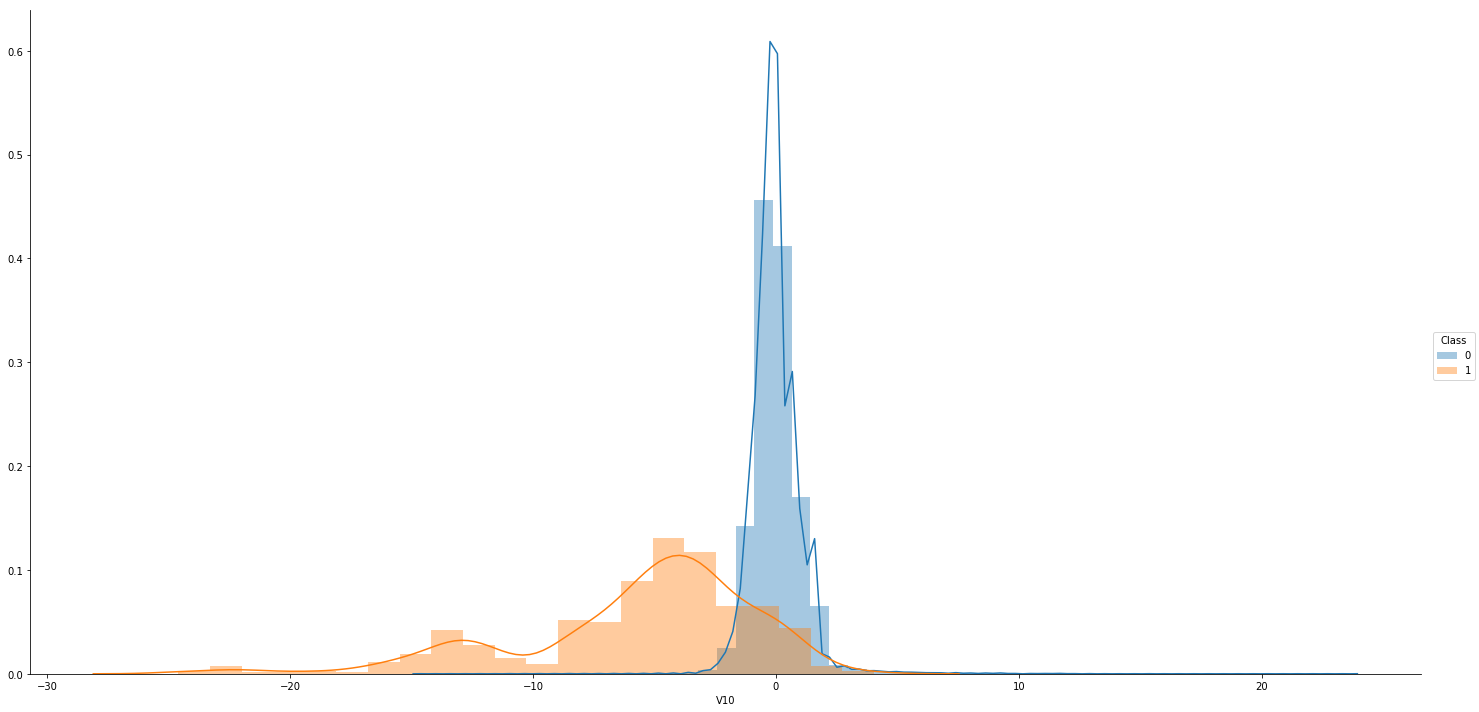

In [160]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V10") \
   .add_legend();

In [166]:
print(np.percentile(fraudulent['V10'],q=[86]))
print(np.percentile(genuine['V10'], q=[14]))

[-0.87019182]
[-0.86167548]


Visually one can tell this feature is a great one offering 86% classification accuracy

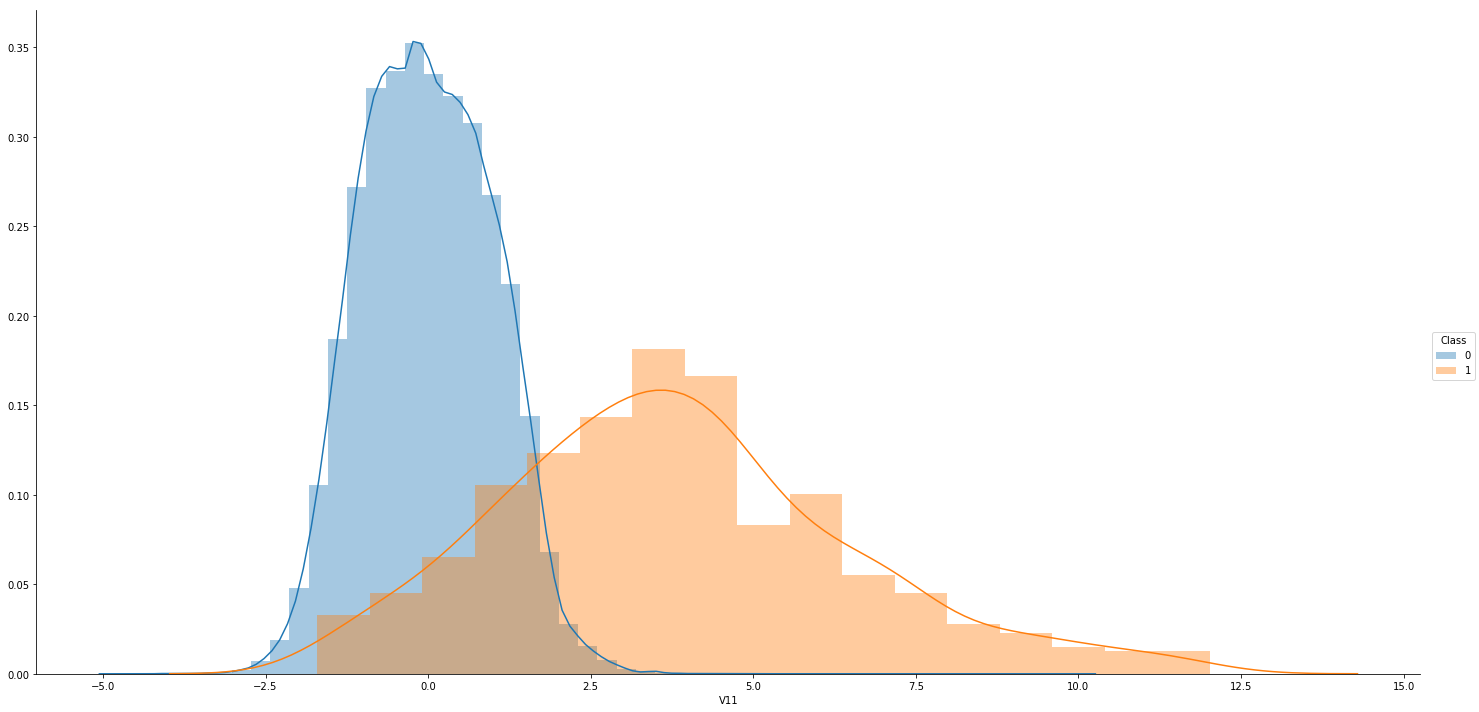

In [68]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V11") \
   .add_legend();

In [169]:
print(np.percentile(fraudulent['V11'],q=[16]))
print(np.percentile(genuine['V11'], q=[84]))

[ 1.17053386]
[ 1.05966576]


This is also a great feature offering an 84% accuracy

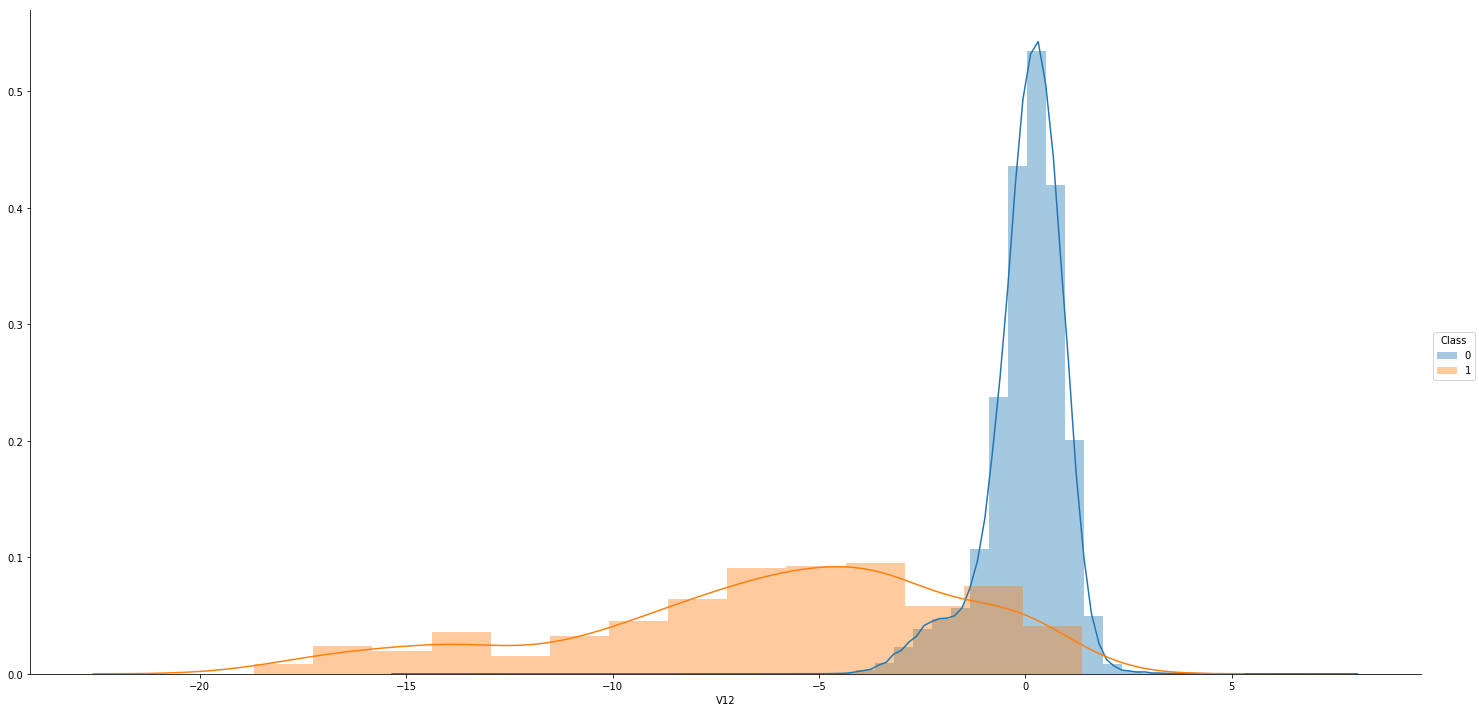

In [69]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V12") \
   .add_legend();

In [173]:
print(np.percentile(fraudulent['V12'],q=[86]))
print(np.percentile(genuine['V12'], q=[14]))

[-0.83130394]
[-0.8352217]


This is also a good feature offering roughly 86% accuracy

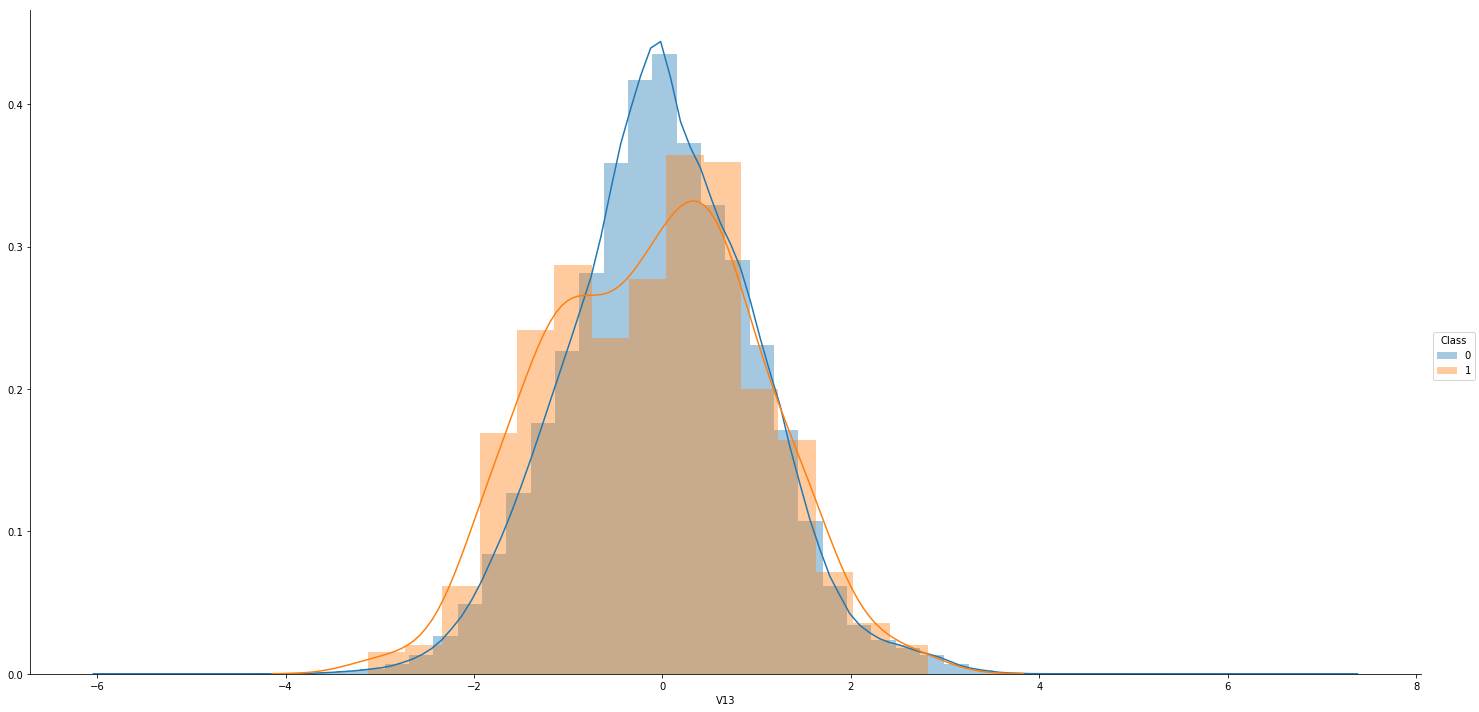

In [70]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V13") \
   .add_legend();

Clearly not a good feature

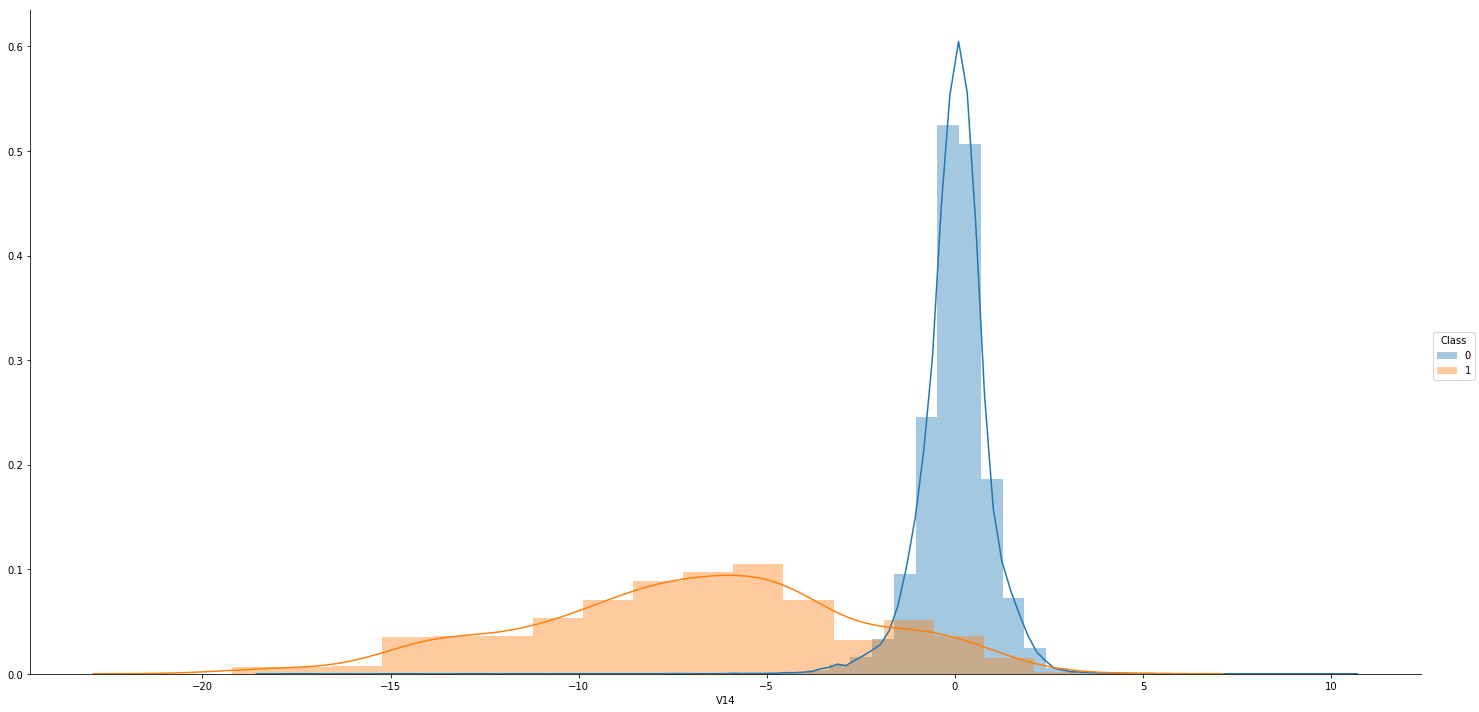

In [71]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V14") \
   .add_legend();

In [177]:
print(np.percentile(fraudulent['V14'],q=[90]))
print(np.percentile(genuine['V14'], q=[10]))

[-1.07836903]
[-0.99523233]


An astounding 90% sets this feature apart from others

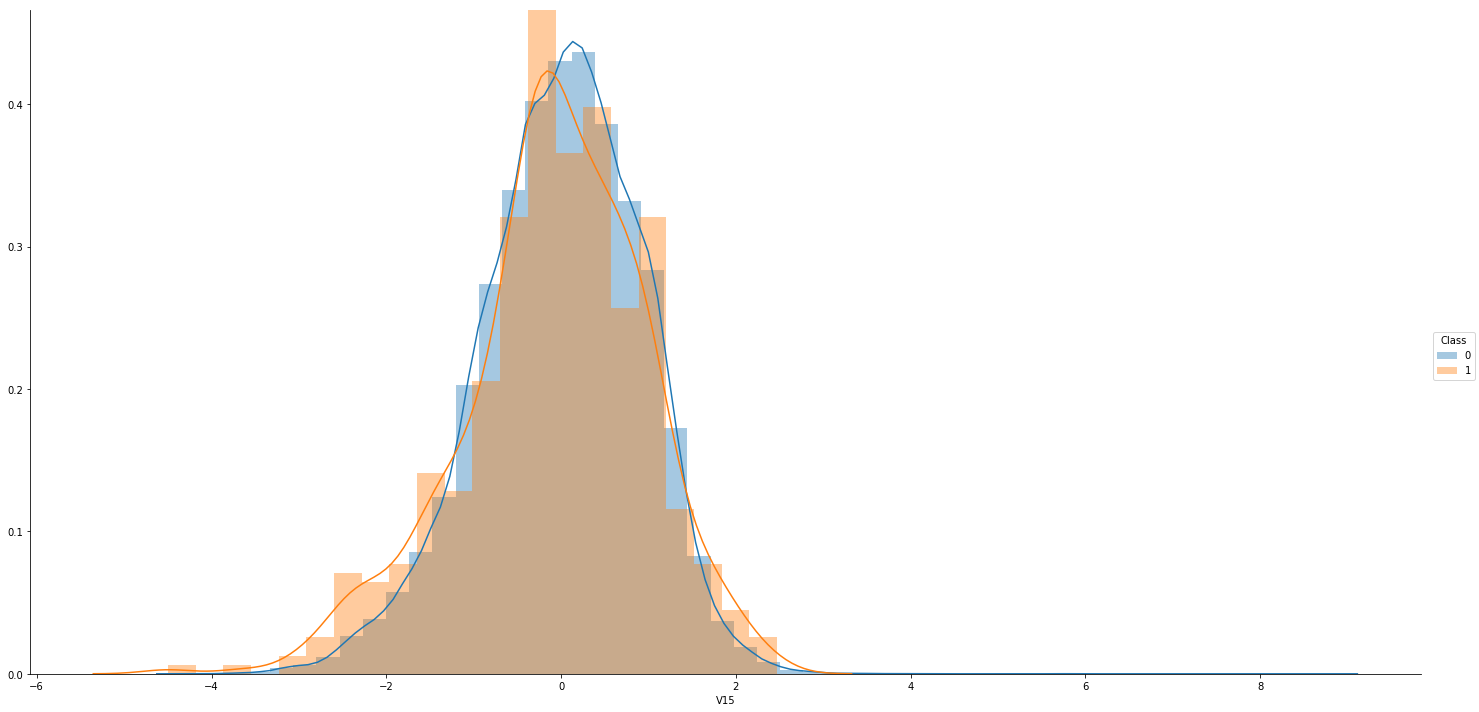

In [72]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V15") \
   .add_legend();

Not a good feature again

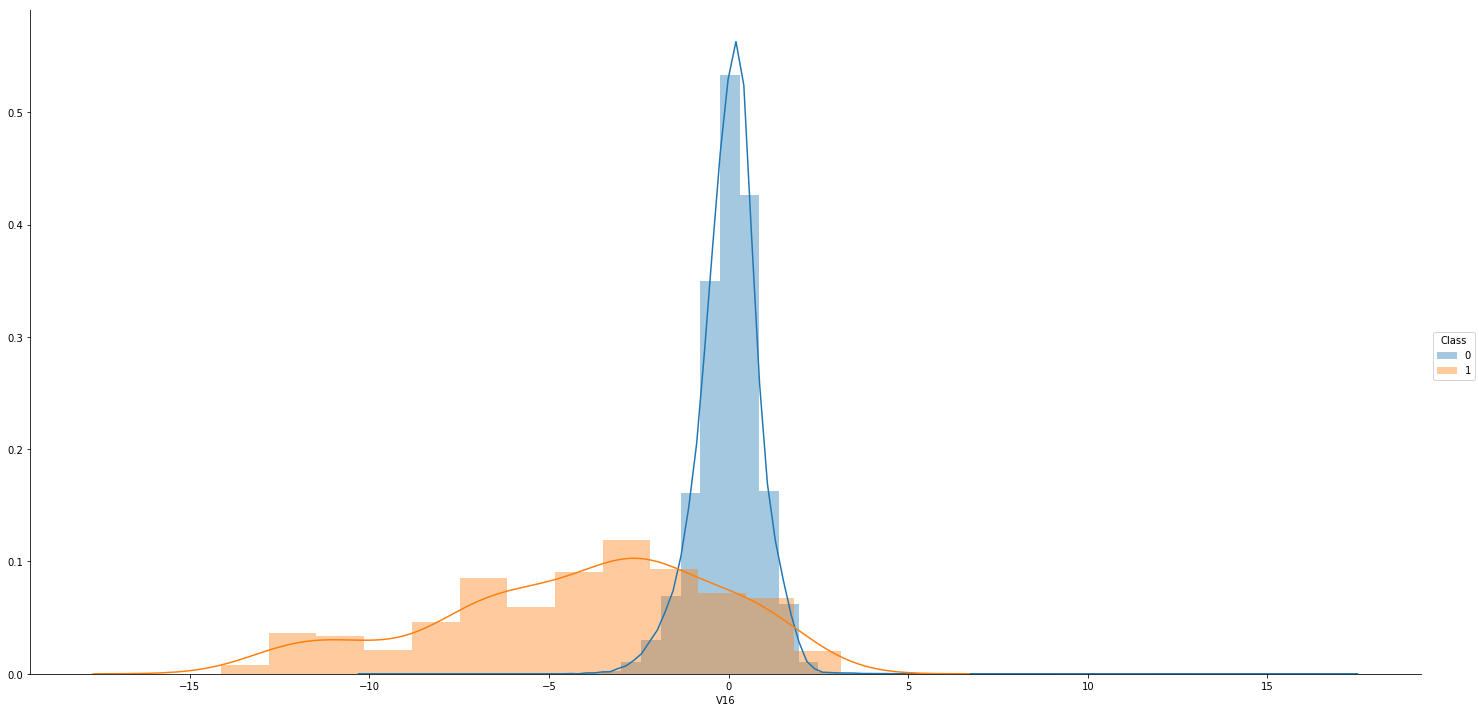

In [73]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V16") \
   .add_legend();

In [182]:
print(np.percentile(fraudulent['V5'],q=[65]))
print(np.percentile(genuine['V5'], q=[35]))

[-0.51484326]
[-0.41165364]


Fairly good feature with 65% success rate

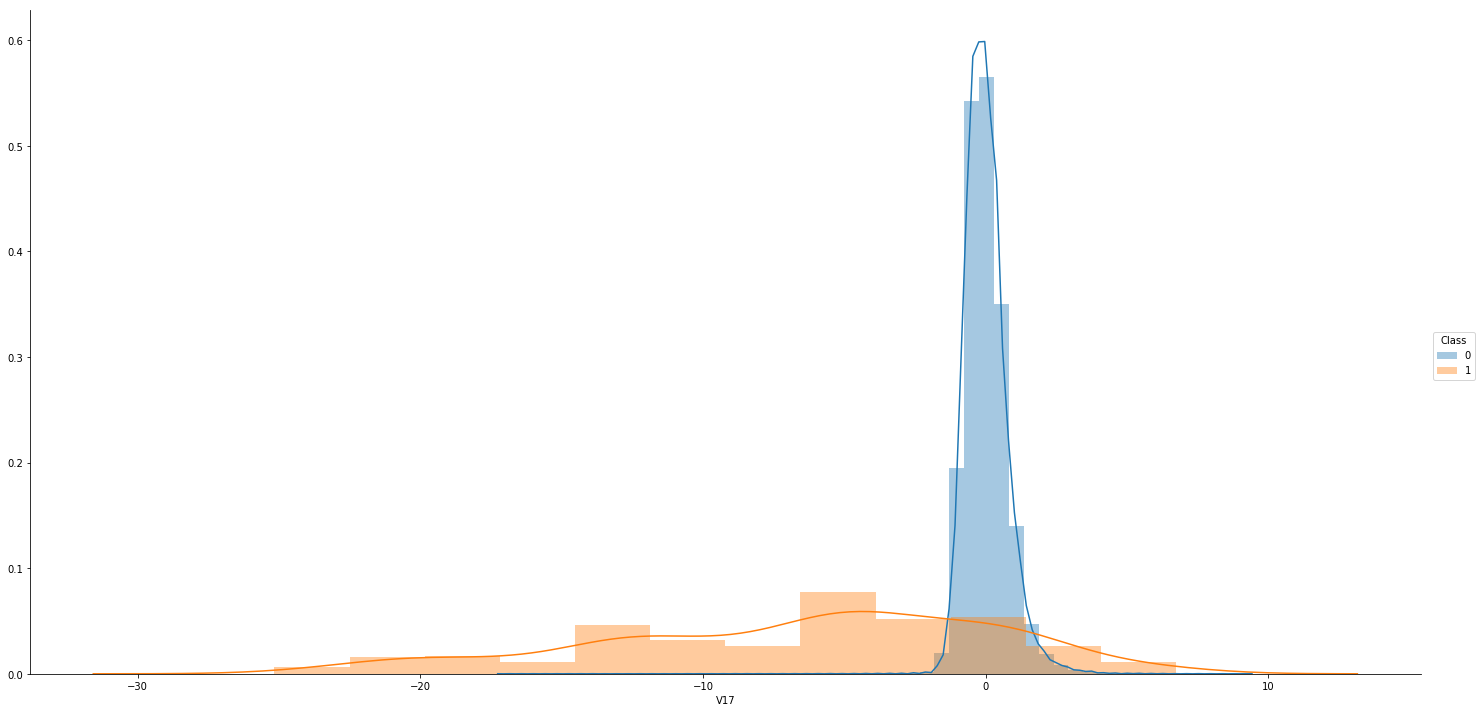

In [74]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V17") \
   .add_legend();

In [190]:
print(np.percentile(fraudulent['V17'],q=[77]))
print(np.percentile(genuine['V17'], q=[25,23,75]))

[-0.78197431]
[-0.48264388 -0.51722041  0.39992239]


One noticeable fact about this feature is large percentage of genuine transactions within the inter quartile range of -0.482 to 0.399

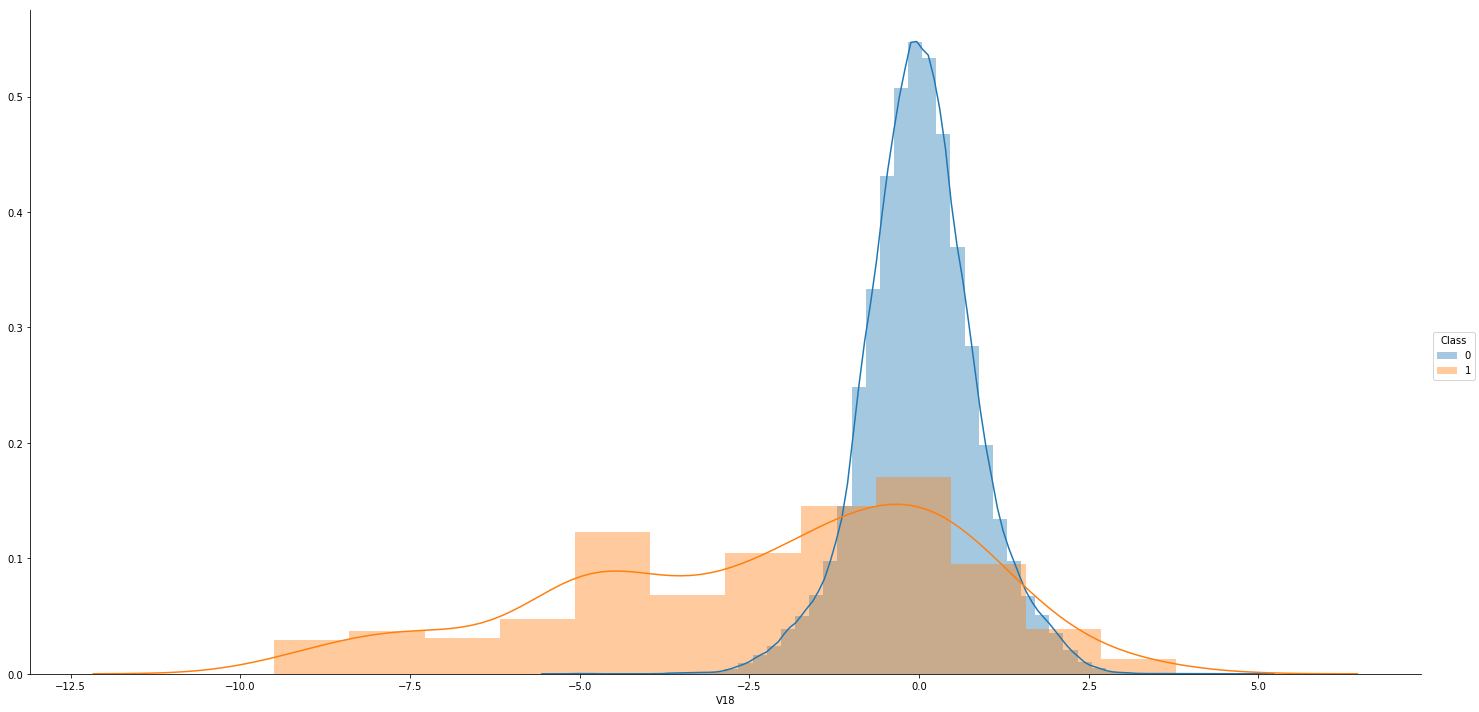

In [75]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V18") \
   .add_legend();

In [192]:
print(np.percentile(fraudulent['V5'],q=[65]))
print(np.percentile(genuine['V5'], q=[35]))

[-0.51484326]
[-0.41165364]


Fairly good feature with 65% success rate

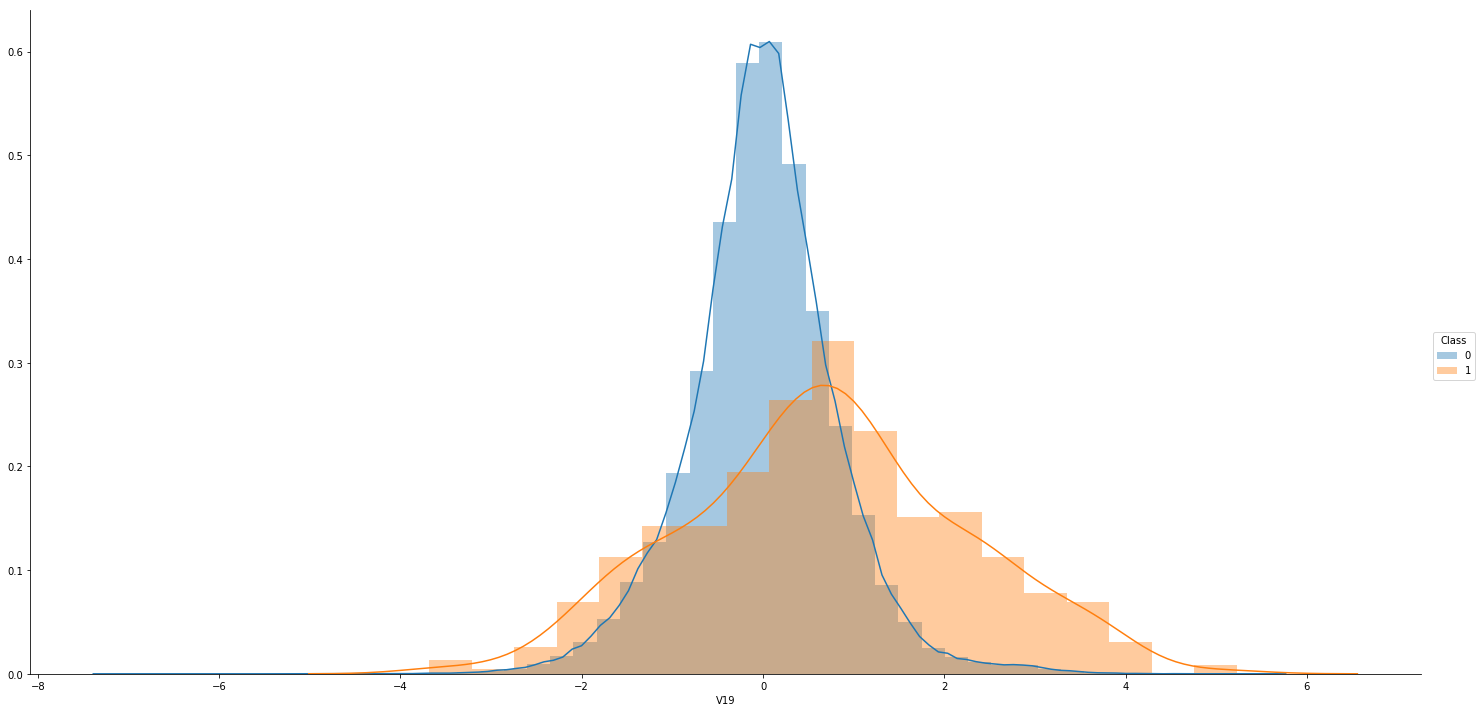

In [76]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V19") \
   .add_legend();

In [205]:
print(np.percentile(fraudulent['V19'],q=[37]))
print(np.percentile(genuine['V19'], q=[63]))

[ 0.23298149]
[ 0.21476089]


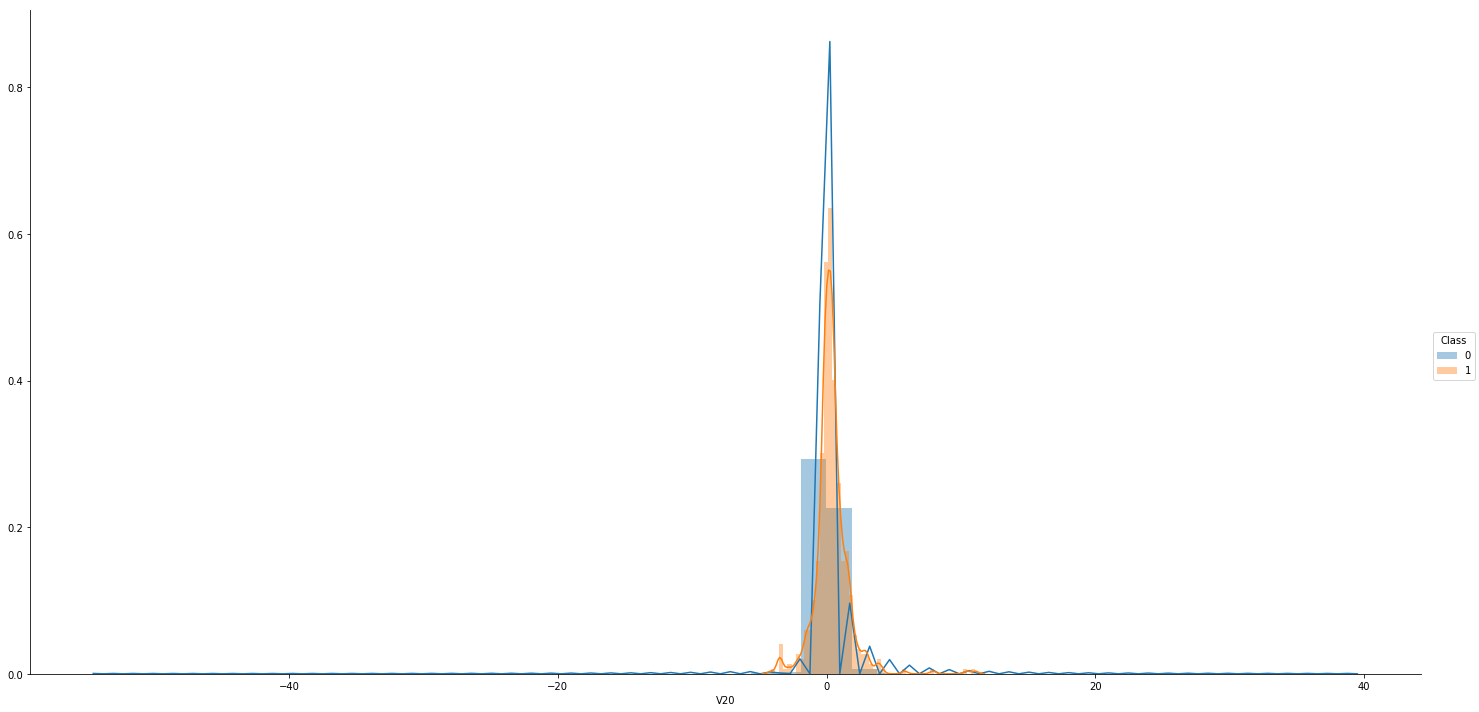

In [77]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V20") \
   .add_legend();

Clearly not a good feature

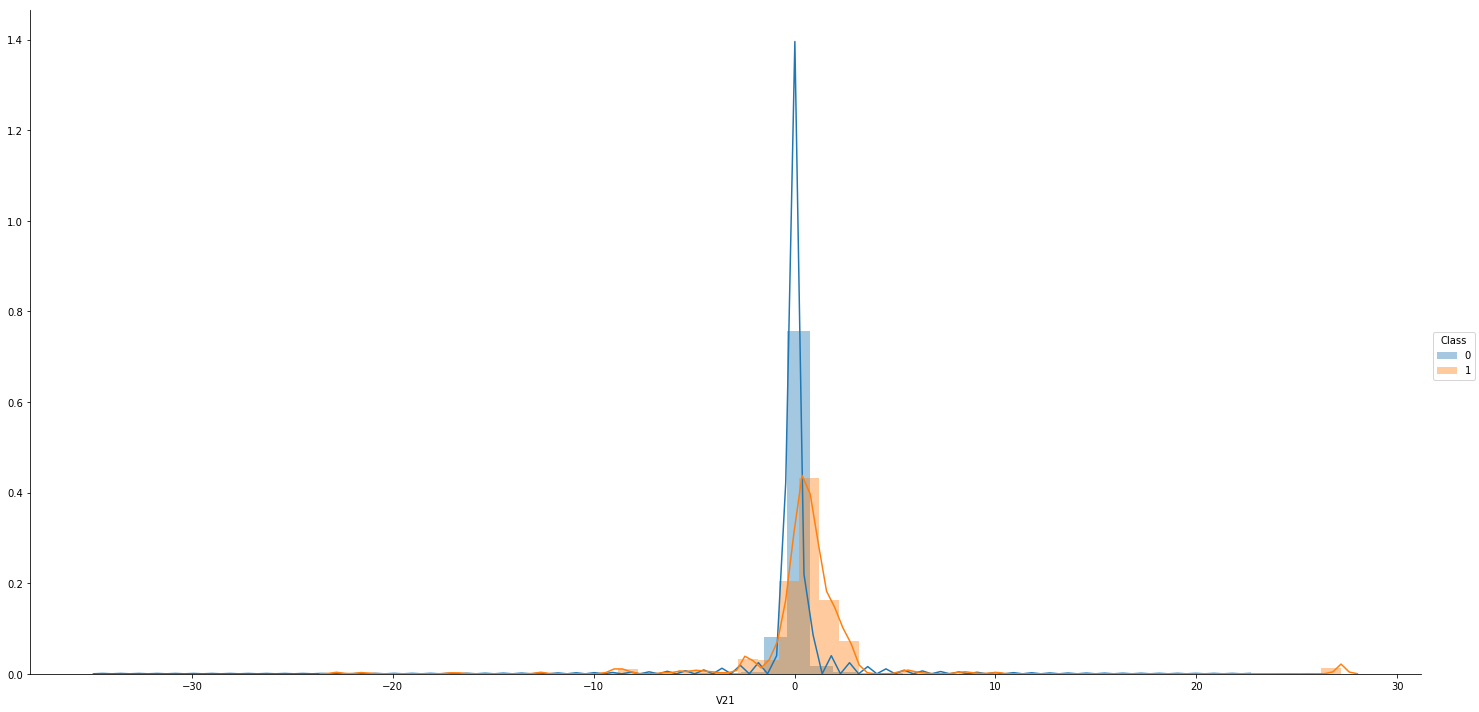

In [78]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V21") \
   .add_legend();

In [212]:
print(np.percentile(fraudulent['V21'],q=[29]))
print(np.percentile(genuine['V21'], q=[71]))

[ 0.15203493]
[ 0.14681008]


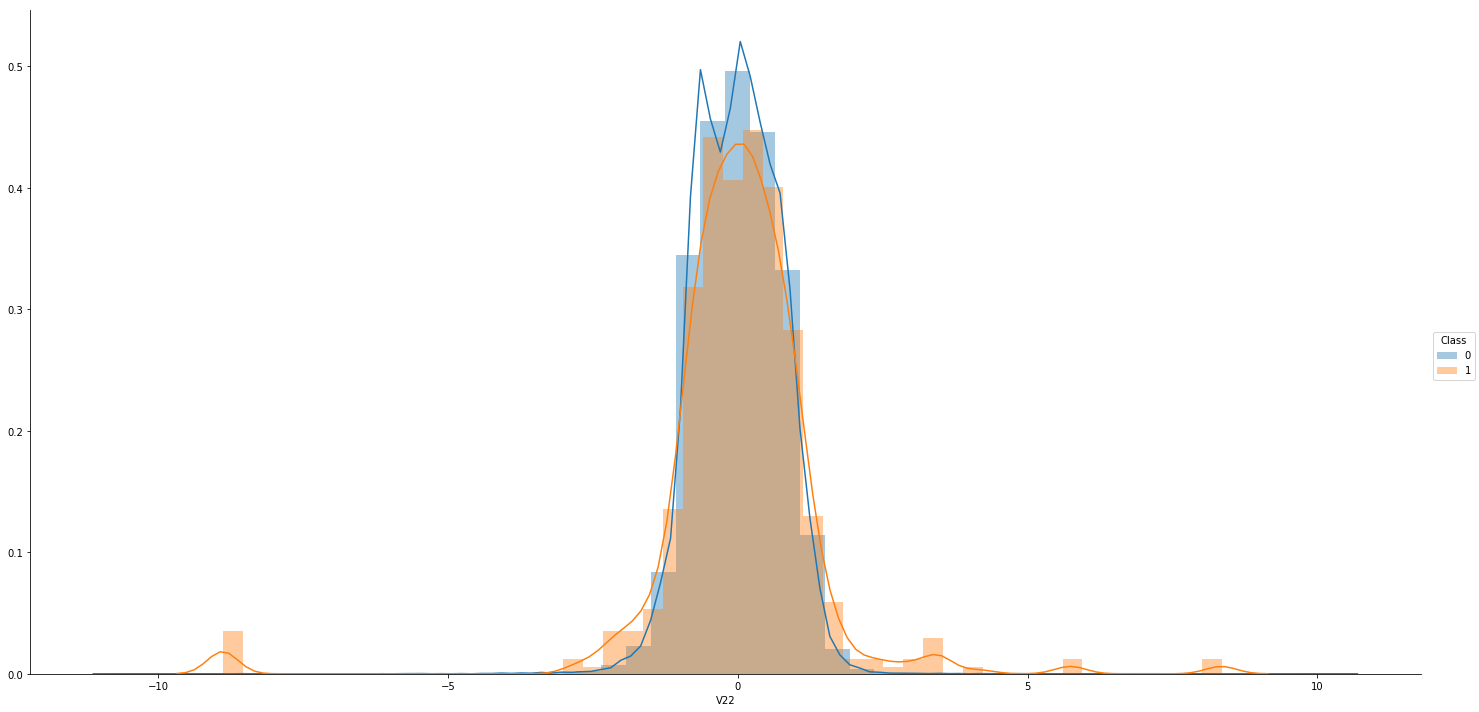

In [79]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V22") \
   .add_legend();

Again not a very good feature

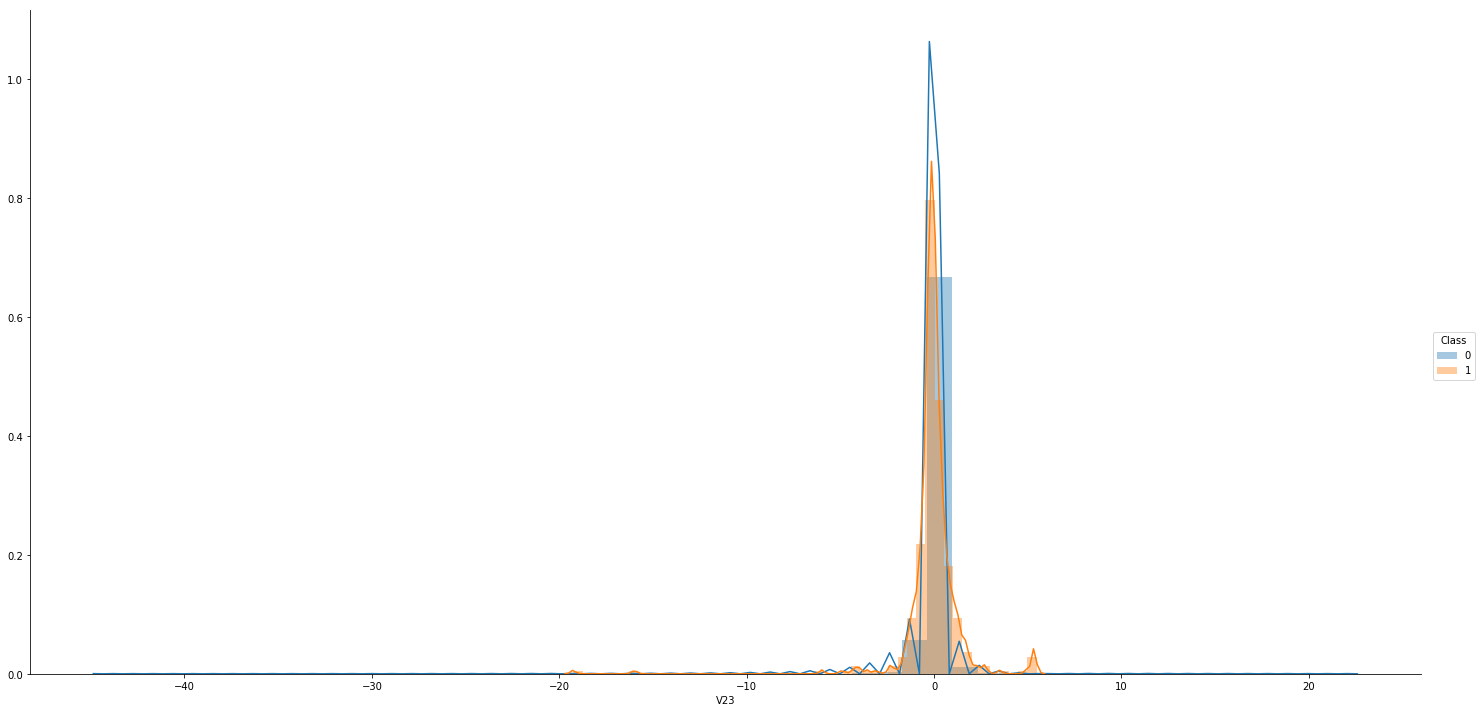

In [80]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V23") \
   .add_legend();

Massive overlap, not a good feature

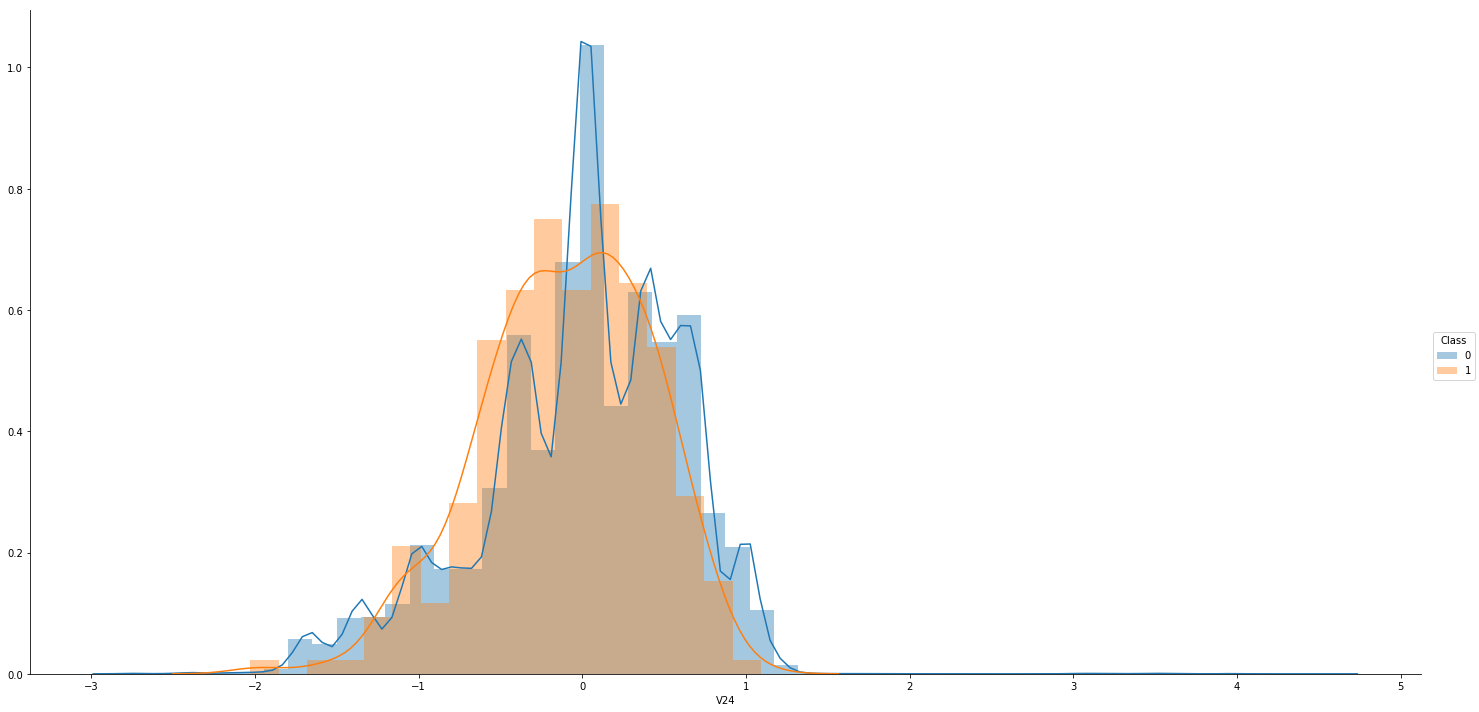

In [81]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V24") \
   .add_legend();

Not a good feature due to overlap

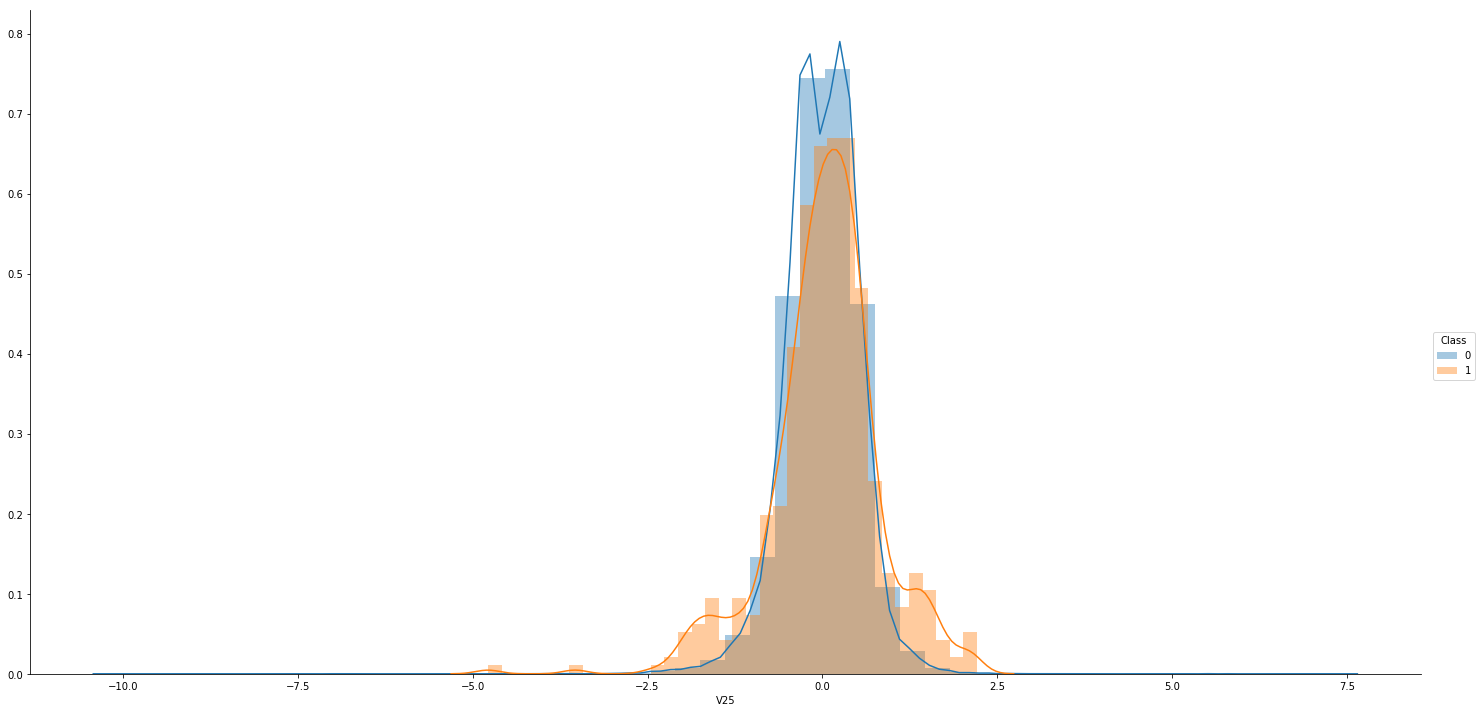

In [82]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V25") \
   .add_legend();

Not a good feature due to overlap

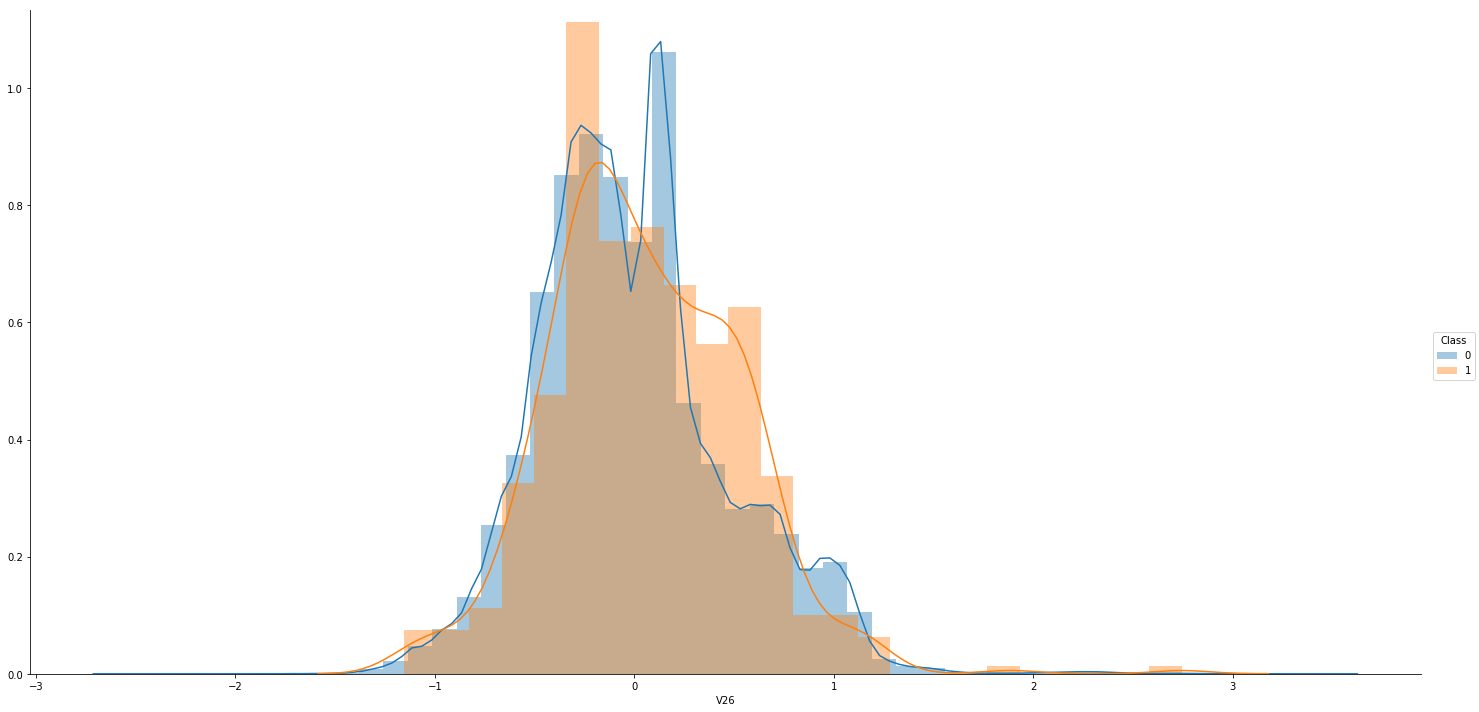

In [83]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V26") \
   .add_legend();

Not a good feature due to overlap

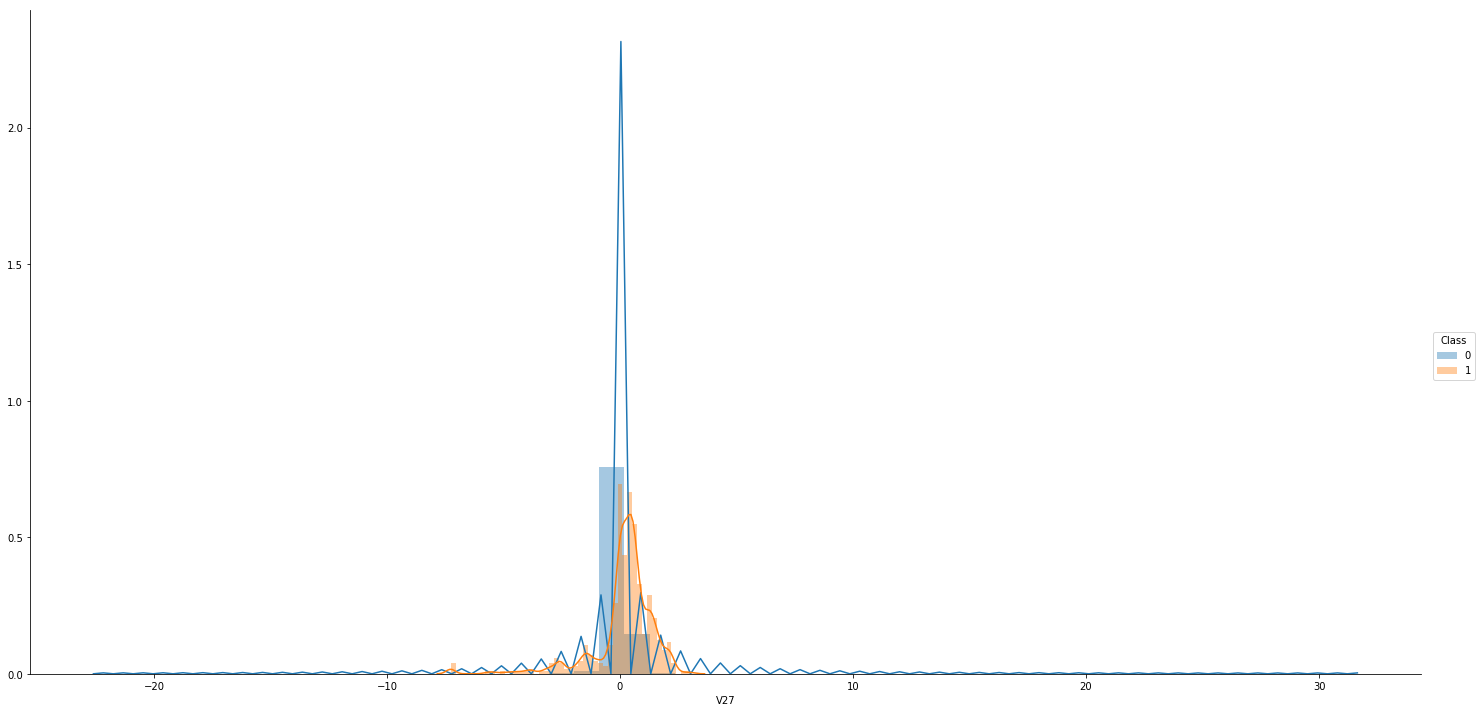

In [84]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V27") \
   .add_legend();

Not a good feature due to overlap

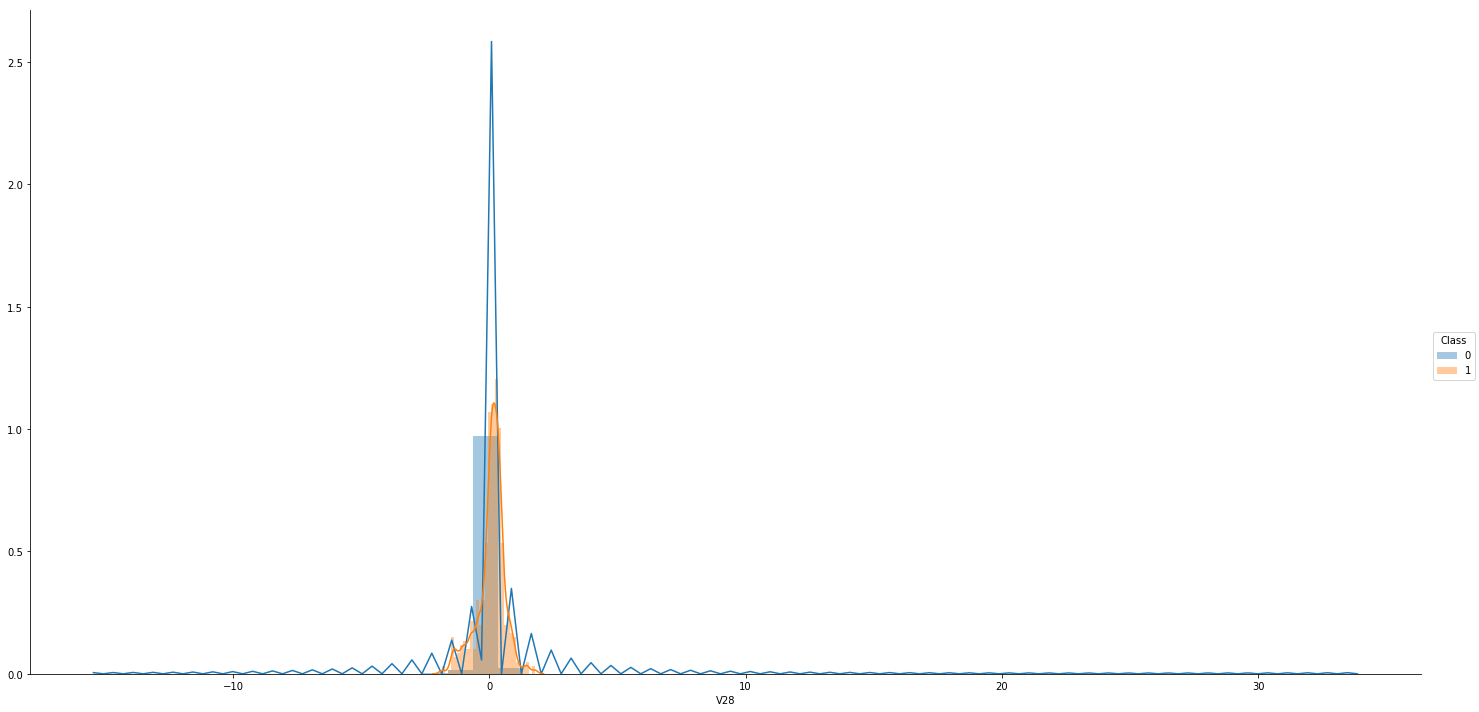

In [85]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "V28") \
   .add_legend();

Not a good feature due to overlap

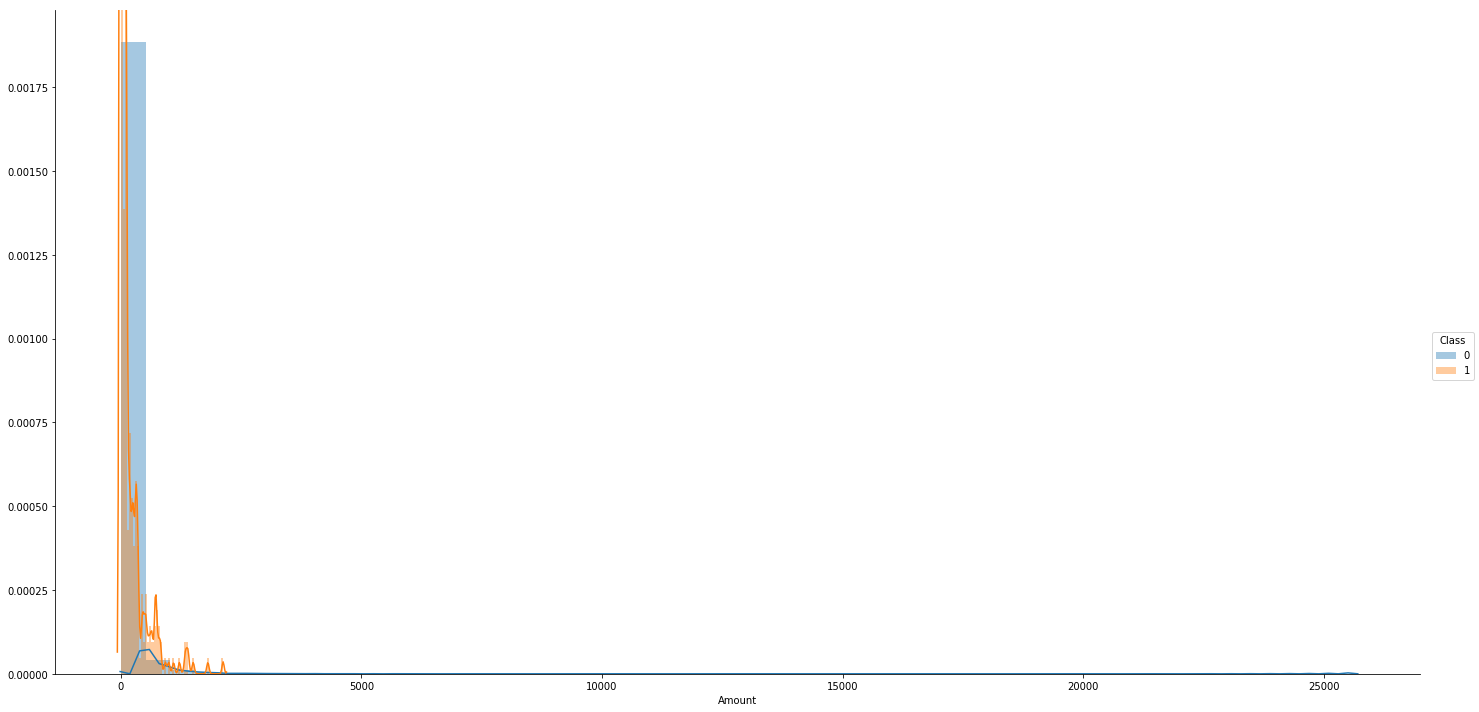

In [86]:
sns.FacetGrid(df, hue="Class", size=10, aspect=2) \
   .map(sns.distplot, "Amount") \
   .add_legend();

This again is not a good feature due to heavy overlap between 2 pdfs

## List of good features
V14 > V10 > V12 > V4 > V11 > V3 > V2 > V9 > V7 > V6 > V1 > V5

In [218]:
trans_dict={0:'genuine', 1:'fraudulent'}
df['Class']=df.Class.apply(lambda x:trans_dict[x])

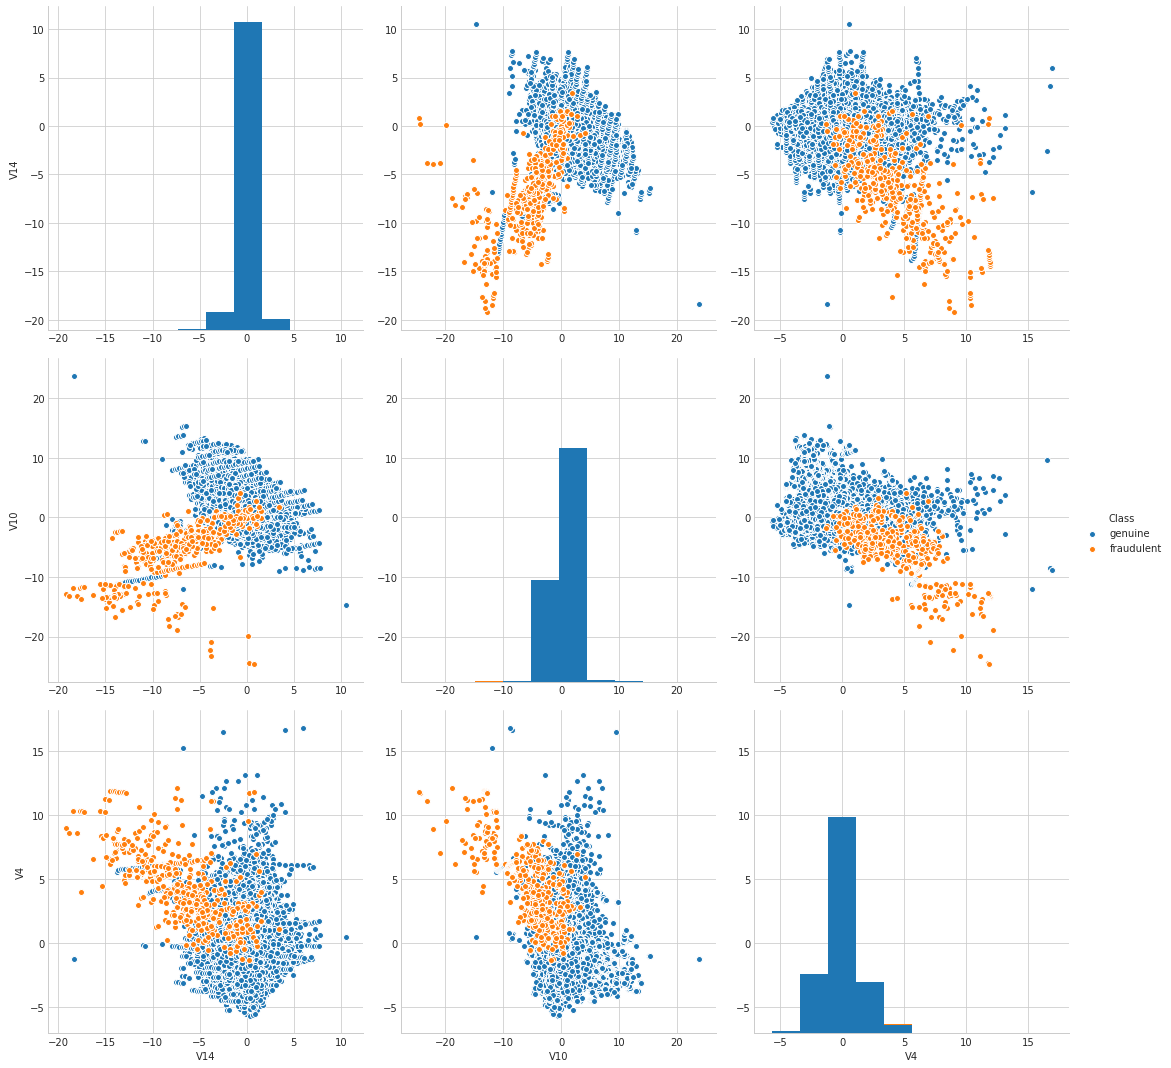

In [220]:
sns.set_style("whitegrid");
sns.pairplot(df[['Class', 'V14', 'V10', 'V4']], hue="Class", size=5);

(V14, V10) > (V14, V4) > (V10, V4)

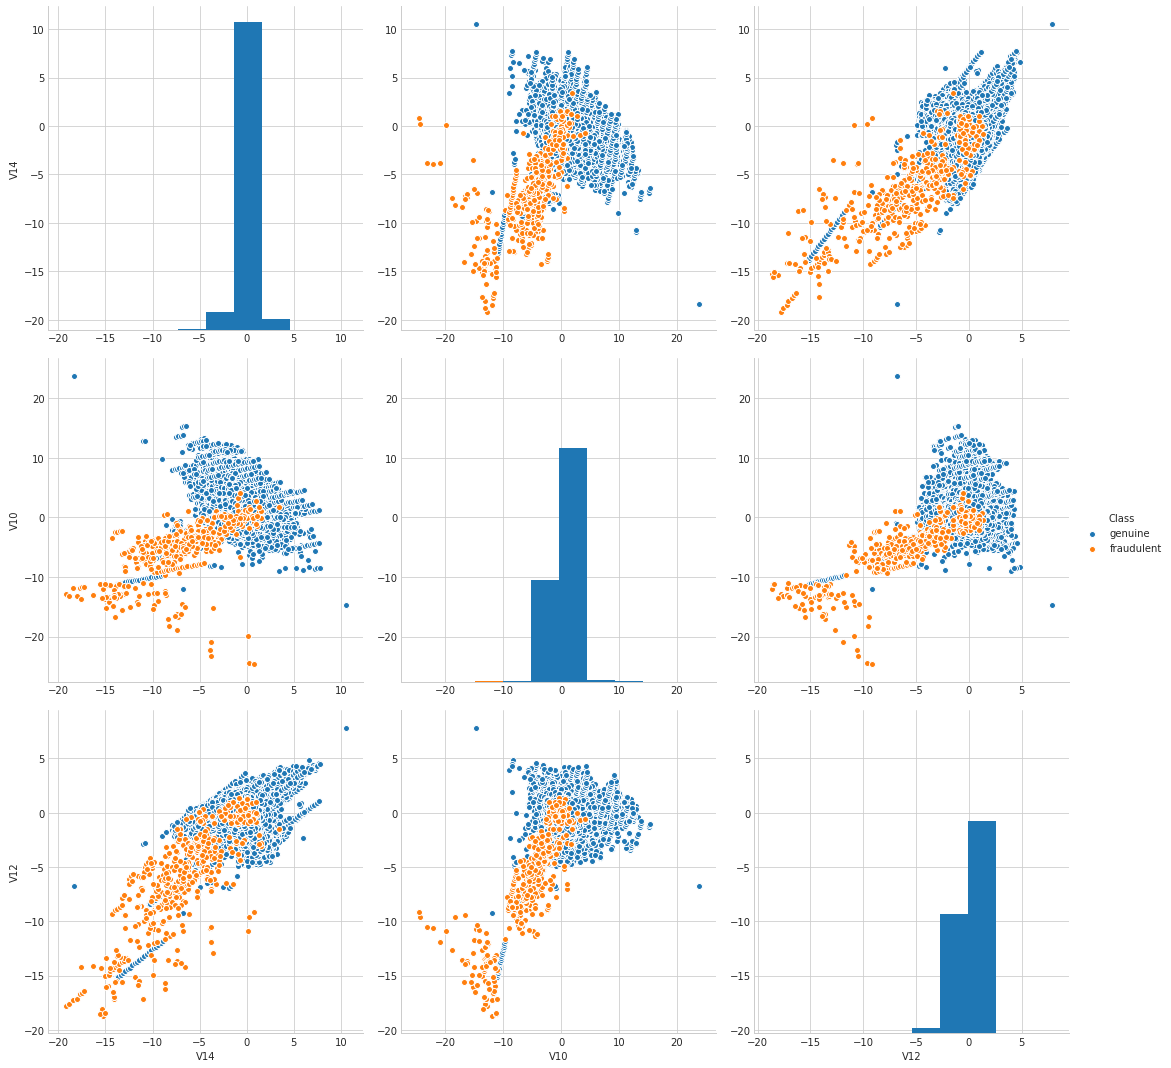

In [221]:
sns.pairplot(df[['Class', 'V14', 'V10', 'V12']], hue="Class", size=5);

(V14, V10) > (V14, V12) > (V10, V12)

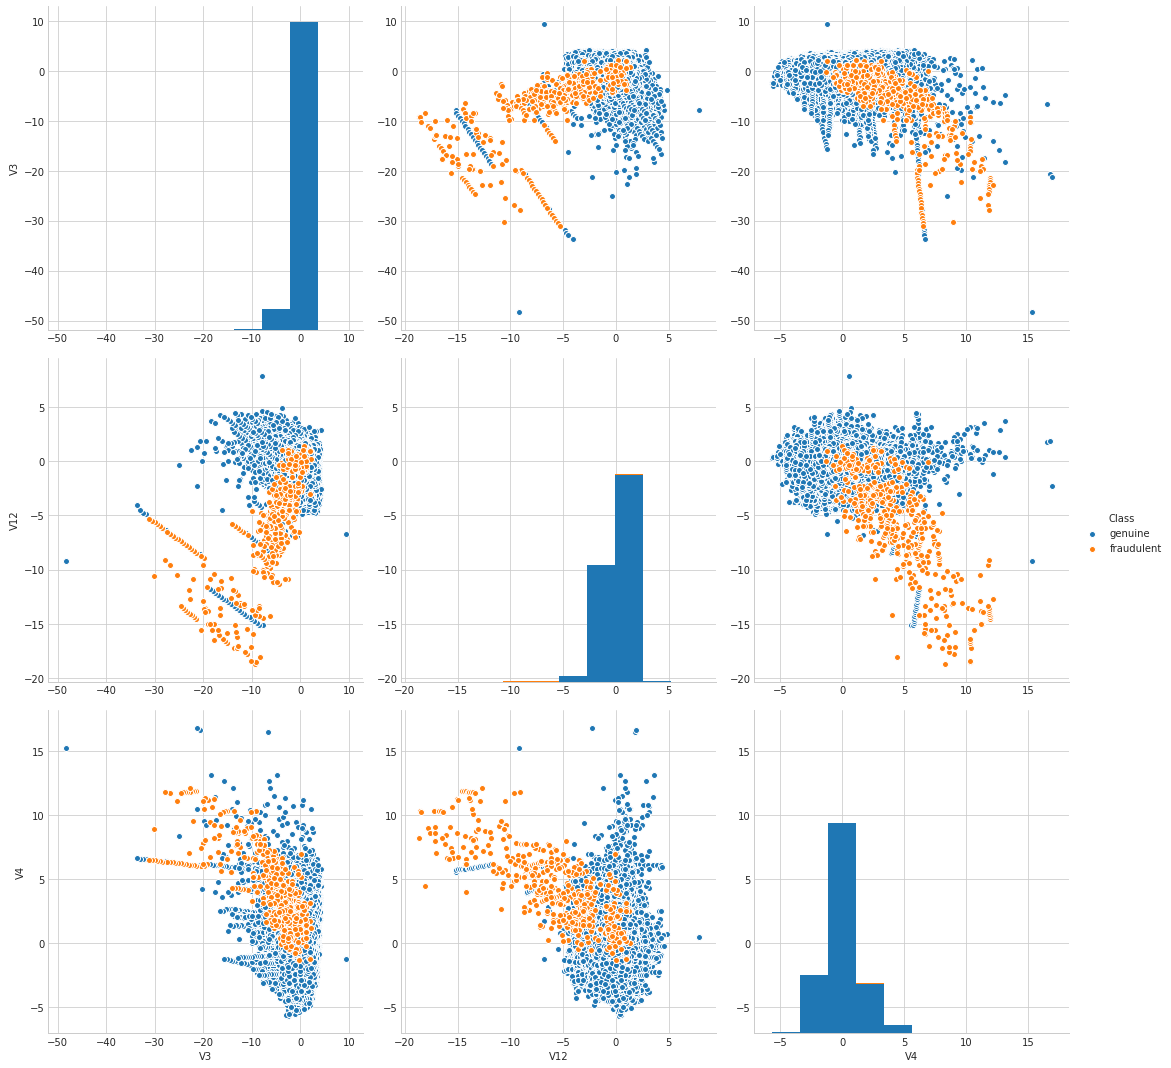

In [222]:
sns.pairplot(df[['Class', 'V3', 'V12', 'V4']], hue="Class", size=5);

(V12, V3) > (V12, V4) > (V4, V3)

# Univariate analysis using box plots
Although percentiles have been evaluated before, the best chosen features are evaluated here for better visualisation

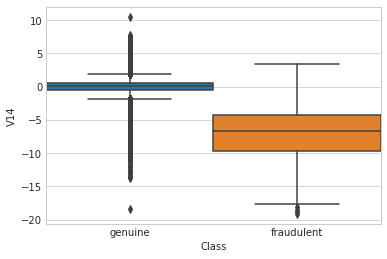

In [223]:
sns.boxplot(x='Class', y='V14', data=df, width=1)

Clearly 75% of fraudulent transactions have V14 less than -4 and 75% of genuine transactions have V14 more than about 0

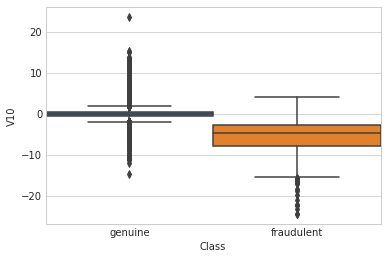

In [224]:
sns.boxplot(x='Class', y='V10', data=df, width=1)

Similar trend can be observed for V10

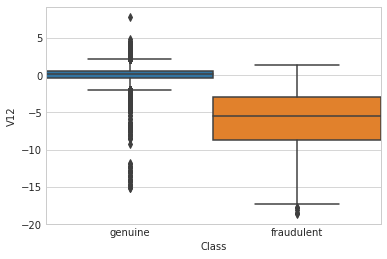

In [225]:
sns.boxplot(x='Class', y='V12', data=df, width=1)

and V12

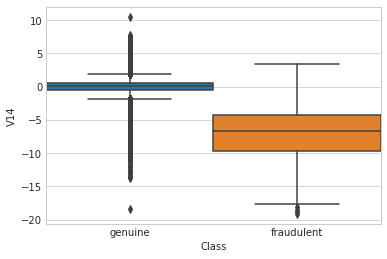

In [226]:
sns.boxplot(x='Class', y='V14', data=df, width=1)

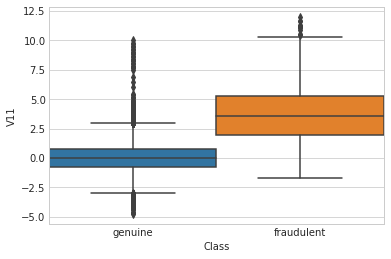

In [227]:
sns.boxplot(x='Class', y='V11', data=df, width=1)

More than 75% fraudulent transactions have V11 above 2.4 whereas more than 75% genuine transactions have V11 below 2.3

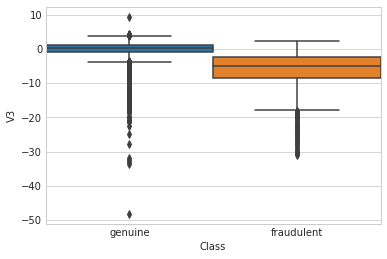

In [229]:
sns.boxplot(x='Class', y='V3', data=df, width=1)

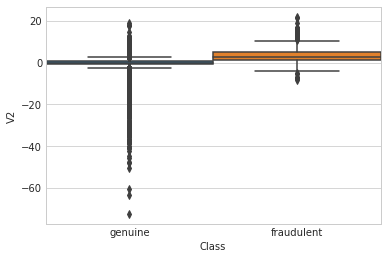

In [230]:
sns.boxplot(x='Class', y='V2', data=df, width=1)

Similar trend as V11

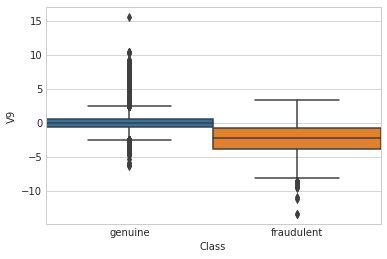

In [231]:
sns.boxplot(x='Class', y='V9', data=df, width=1)

We can observe that moving down the order of relevance of features brings 25% value of one class closer to 75% value of the other

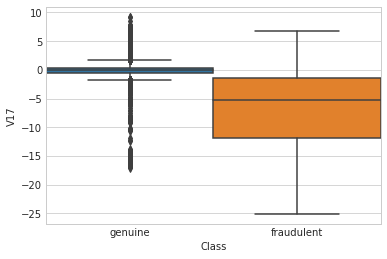

In [232]:
sns.boxplot(x='Class', y='V17', data=df, width=1)

Although it wasn't evident from pdf, box plots reveal that V17 separates 2 classes better than V9

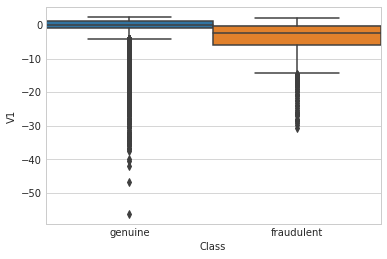

In [240]:
sns.boxplot(x='Class', y='V1', data=df, width=1)

# Conclusion
The best 12 features have been enumerated for classification. Although it seems intuitive that transaction amount should count towards a valuable feature, it does not